<a href="https://colab.research.google.com/github/MitodruGhosh/Customer-Behaviour-Analysis-using-Loss-Function-in-Federated-Machine-Learning-A-Comparision-Study/blob/main/Copy_of_Customer_Behaviour_analysis_using_loss_function_in_fedarated_machine_Learning_A_Comparison%C2%A0analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Cell 01
# Basic packages
!pip install impyute
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
from impyute.imputation.cs import mice


# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

In [ ]:
#Cell 02
# Reading the data as dataframe and print the first five rows
bank = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/03_Ensemble Techniques/bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Cell 03
# Get info of the dataframe columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Cell 04
bank.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [ ]:
#Cell 05
columns = bank.loc[:, bank.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{bank[cols].unique()}\n')

Unique values for job is 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for marital is 
['married' 'single' 'divorced']

Unique values for education is 
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default is 
['no' 'yes']

Unique values for housing is 
['yes' 'no']

Unique values for loan is 
['no' 'yes']

Unique values for contact is 
['unknown' 'cellular' 'telephone']

Unique values for month is 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for poutcome is 
['unknown' 'failure' 'other' 'success']

Unique values for Target is 
['no' 'yes']



In [ ]:
#Cell 06
display(bank['Target'].value_counts(), bank['Target'].value_counts(normalize = True)*100)

Target
no     39922
yes     5289
Name: count, dtype: int64

Target
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

In [ ]:
#Cell 07
# Replace values in some of the categorical columns
replace_values = {'education': {'unknown': -1, 'primary': 1, 'secondary': 2, 'tertiary': 3}, 'Target': {'no': 0, 'yes': 1},
                  'default': {'no': 0, 'yes': 1}, 'housing': {'no': 0, 'yes': 1}, 'loan': {'no': 0, 'yes': 1},
                  'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}

bank = bank.replace(replace_values)

In [ ]:
#Cell 08
# Convert columns to categorical types
columns.extend(['day'])
for cols in columns:
    bank[cols] = bank[cols].astype('category')

In [ ]:
#Cell 09
# Functions that will help us with EDA(Exploratory Data Analysis) plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))

    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')

    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'Distribution of {col} with outliers')

    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))

    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'Distribution of {col} without outliers')

    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

def target_plot(df, col, target = 'Target'):
    fig = plt.figure(figsize = (15, 7.2))
    # Distribution for 'Target' -- didn't subscribed, considering outliers
    ax = fig.add_subplot(121)
    sns.distplot(df[(df[target] == 0)][col], color = 'c',
                 ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Didn\'t subscribed')

    # Distribution for 'Target' -- Subscribed, considering outliers
    ax= fig.add_subplot(122)
    sns.distplot(df[(df[target] == 1)][col], color = 'b',
             ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Subscribed')
    return plt.show()

def target_count(df, col1, col2):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'Target').set_title(col1.capitalize() +' count plot by Target',
                                                                      fontsize = 13)
    plt.legend(labels = ['Didn\'t Subcribed', 'Subcribed'])
    plt.xticks(rotation = 90)

    ax = fig.add_subplot(122)
    sns.countplot(x = col2, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'Target').set_title(col2.capitalize() +' coount plot by Target',
                                                                      fontsize = 13)
    plt.legend(labels = ['Didn\'t Subcribed', 'Subcribed'])
    plt.xticks(rotation = 90)
    return plt.show()

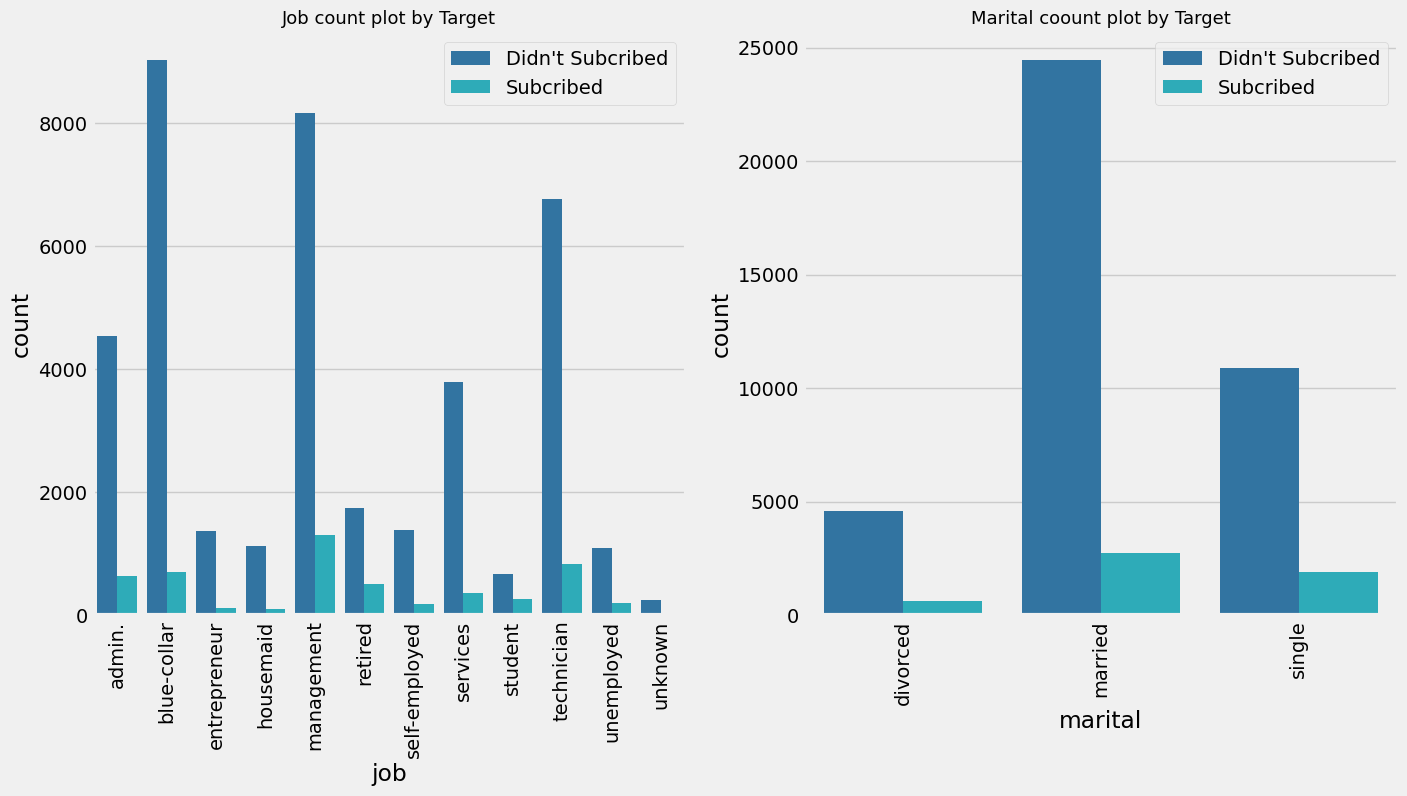

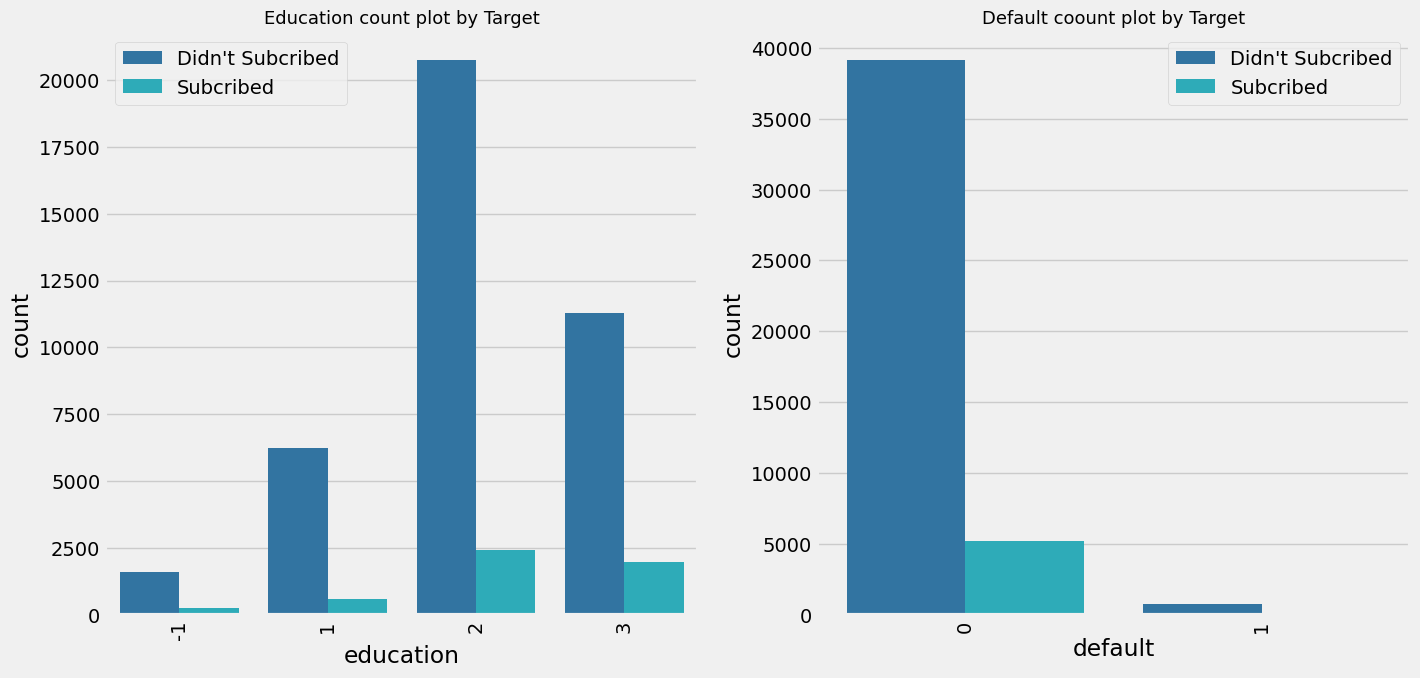

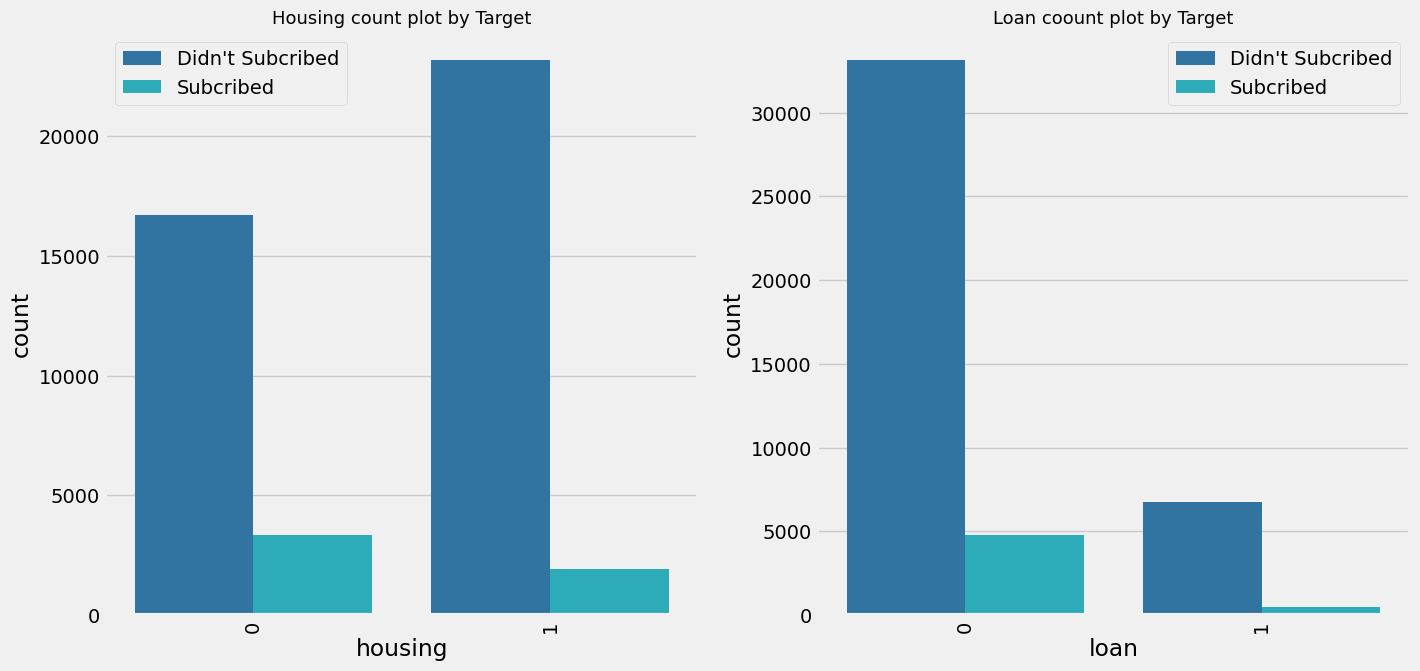

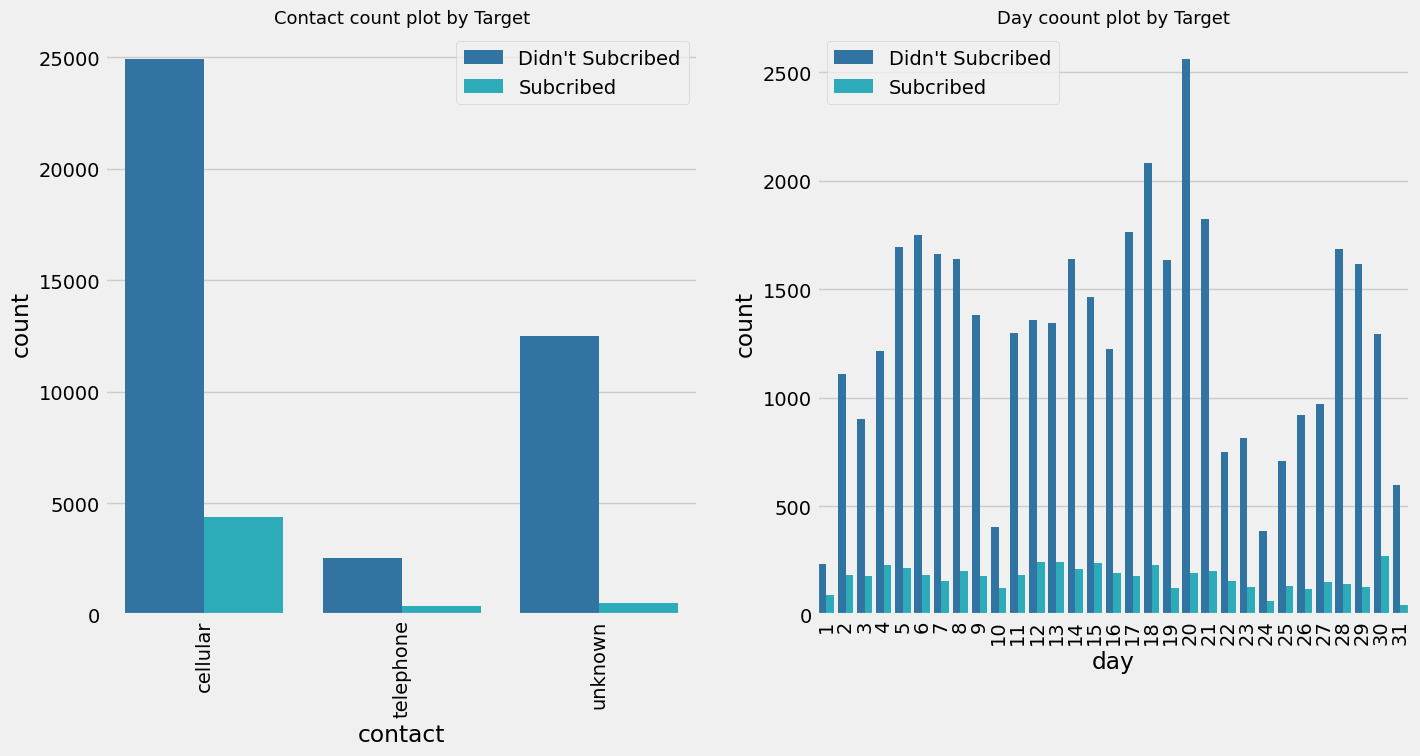

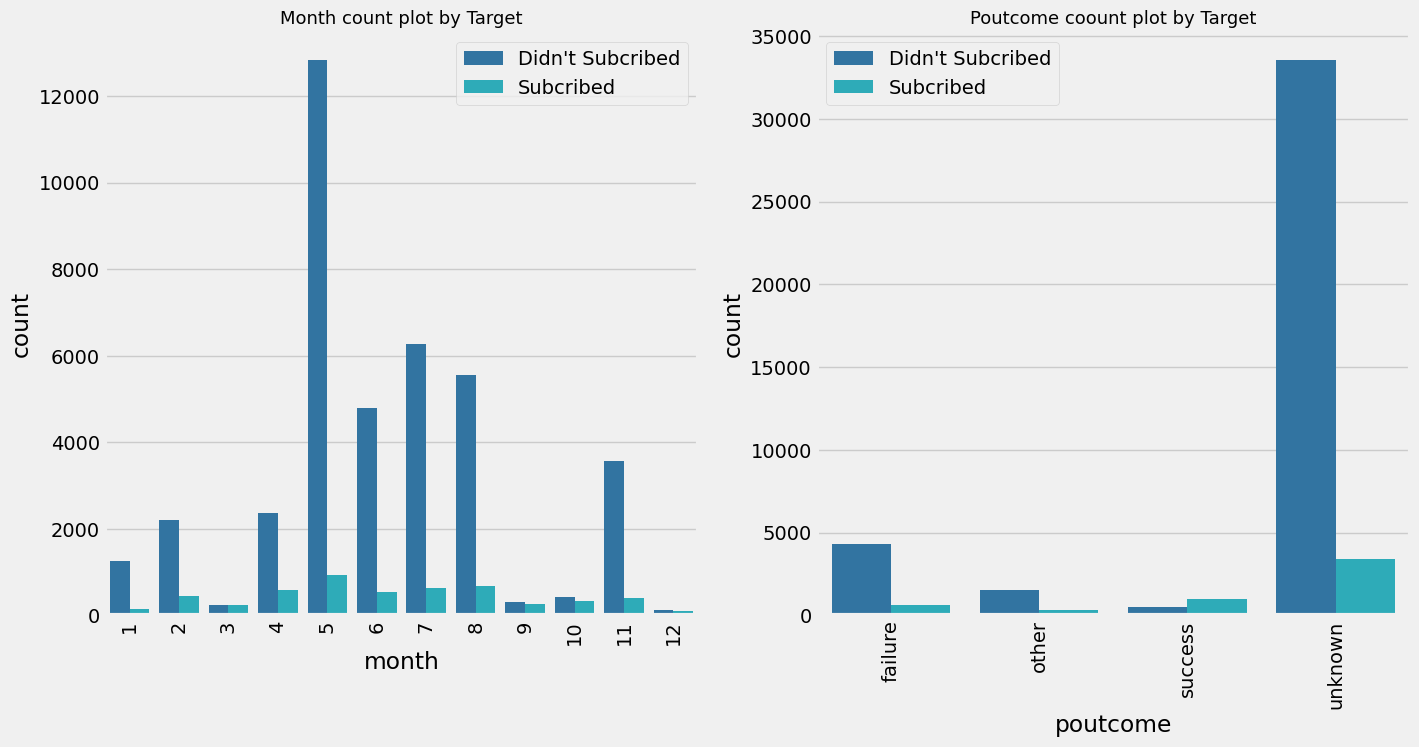

In [ ]:
#Cell 10
# Subscribe and didn't subscribe for categorical columns
target_count(bank, 'job', 'marital')
target_count(bank, 'education', 'default')
target_count(bank, 'housing', 'loan')
target_count(bank, 'contact', 'day')
target_count(bank, 'month', 'poutcome')

Age column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,1,0,425,0,0,telephone,2,2,912,1,-1,0,unknown,0
29261,75,retired,divorced,1,0,46,0,0,cellular,2,2,294,1,-1,0,unknown,0
29263,75,retired,married,1,0,3324,0,0,cellular,2,2,149,1,-1,0,unknown,0
29322,83,retired,married,3,0,6236,0,0,cellular,2,2,283,2,-1,0,unknown,0
29865,75,retired,divorced,1,0,3881,1,0,cellular,4,2,136,3,-1,0,unknown,1


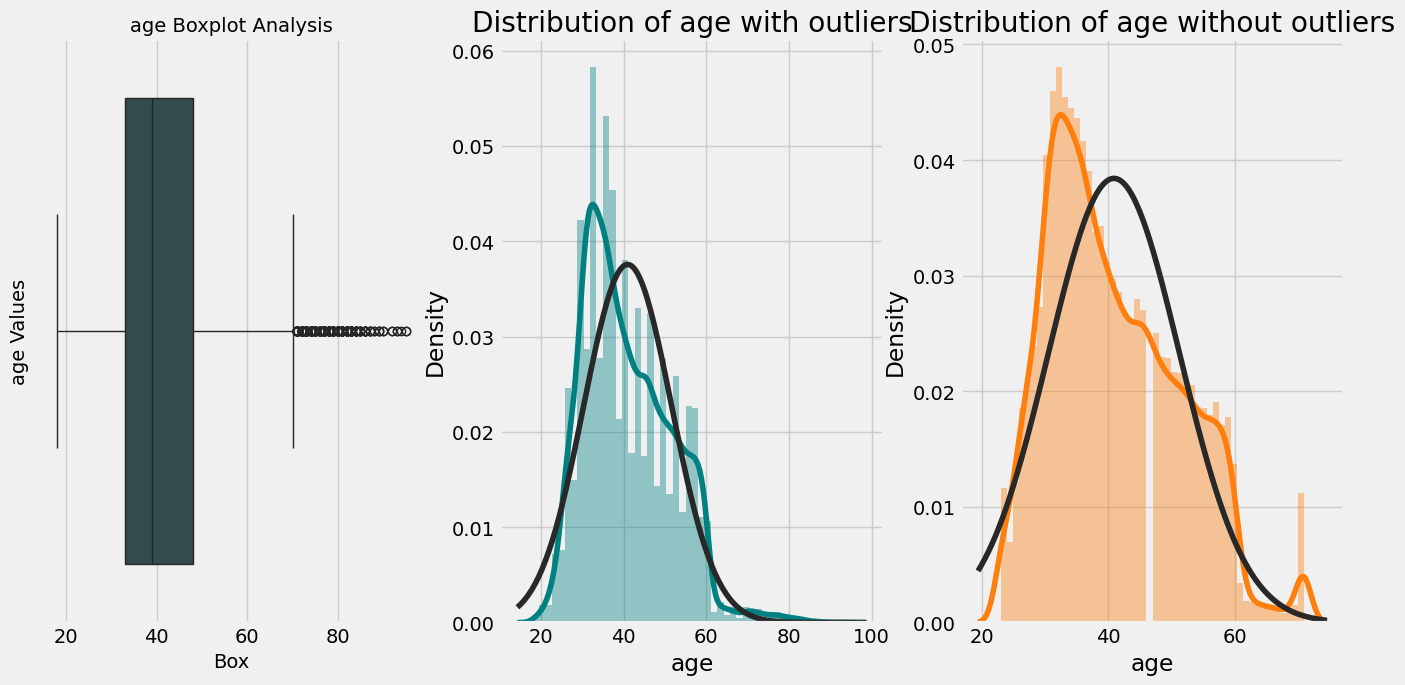

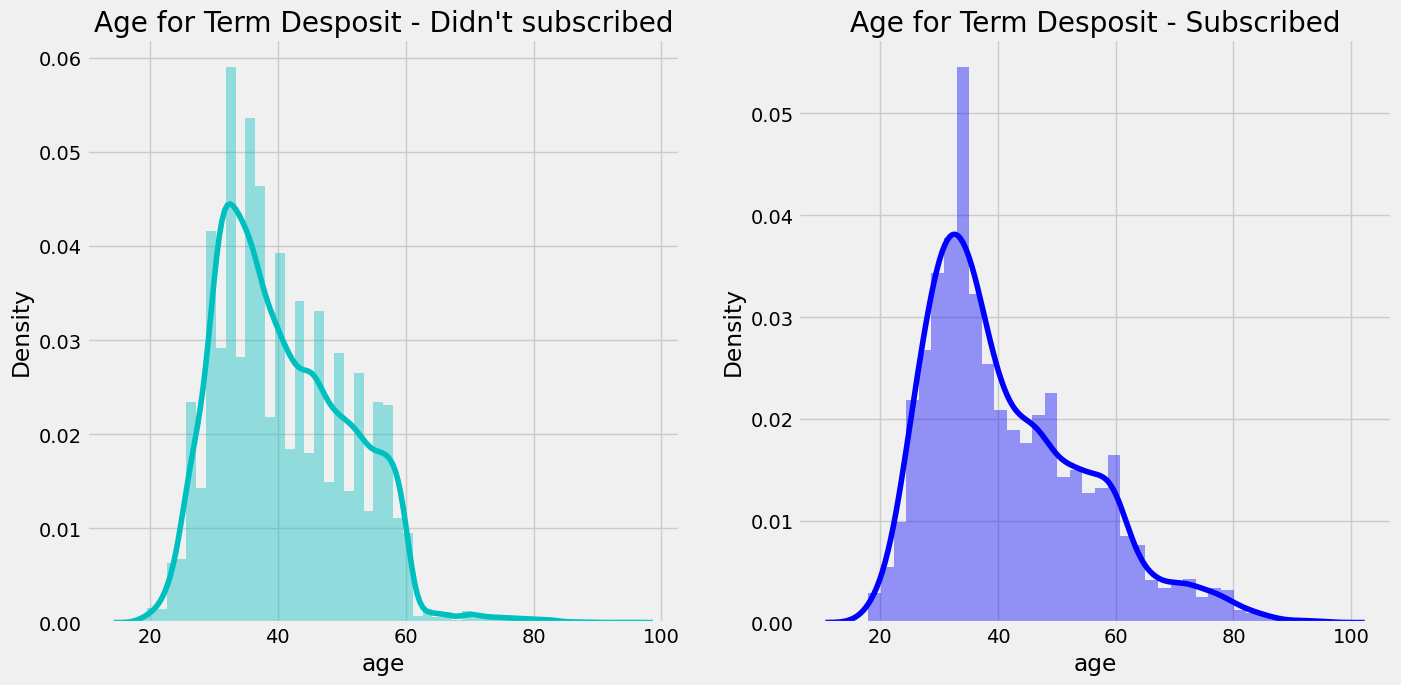

In [ ]:
#Cell 11
# Outlier, distribution for 'age' column
Q3 = bank['age'].quantile(0.75)
Q1 = bank['age'].quantile(0.25)
IQR = Q3 - Q1

print('Age column', '--'*55)
display(bank.loc[(bank['age'] < (Q1 - 1.5 * IQR)) | (bank['age'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'age')

# Distribution of 'age' by 'Target'
target_plot(bank, 'age')

Balance column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,3,0,10635,1,0,unknown,5,5,336,1,-1,0,unknown,0
65,51,management,married,3,0,6530,1,0,unknown,5,5,91,1,-1,0,unknown,0
69,35,blue-collar,single,2,0,12223,1,1,unknown,5,5,177,1,-1,0,unknown,0
70,57,blue-collar,married,2,0,5935,1,1,unknown,5,5,258,1,-1,0,unknown,0
186,40,services,divorced,-1,0,4384,1,0,unknown,5,5,315,1,-1,0,unknown,0


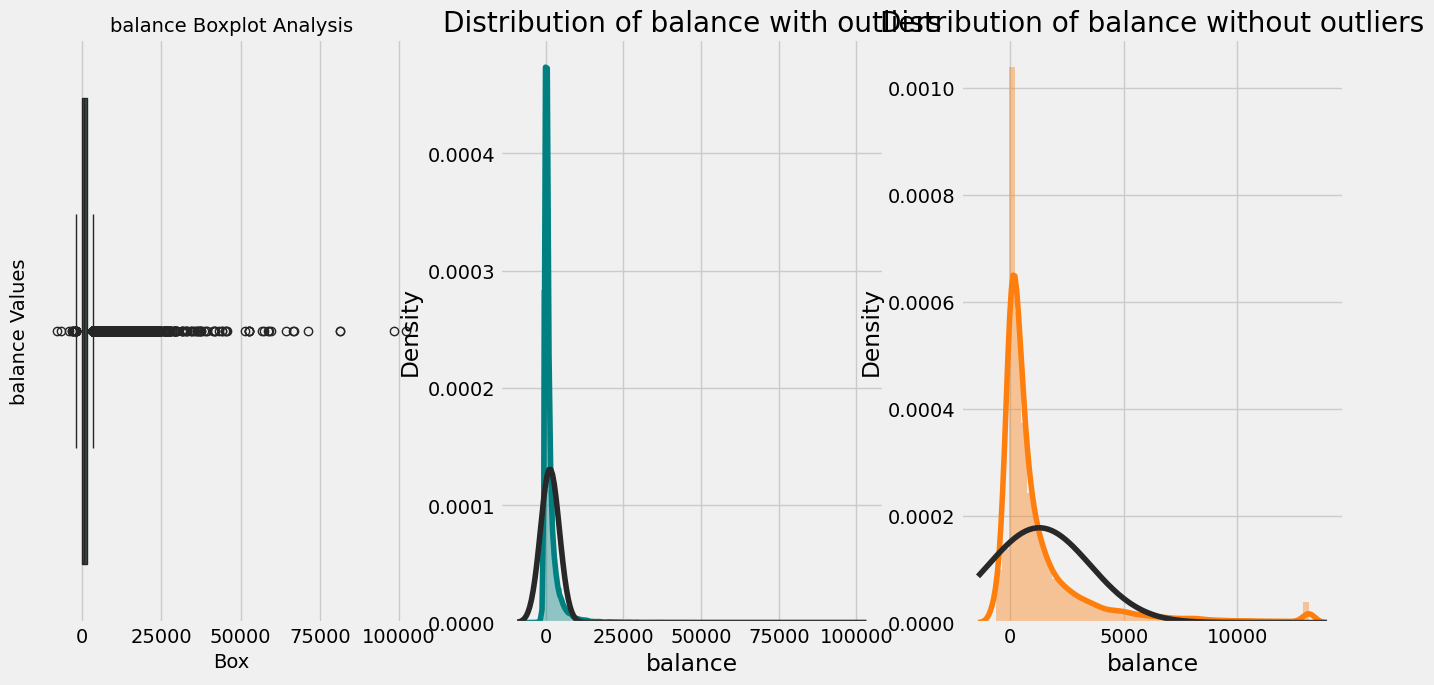

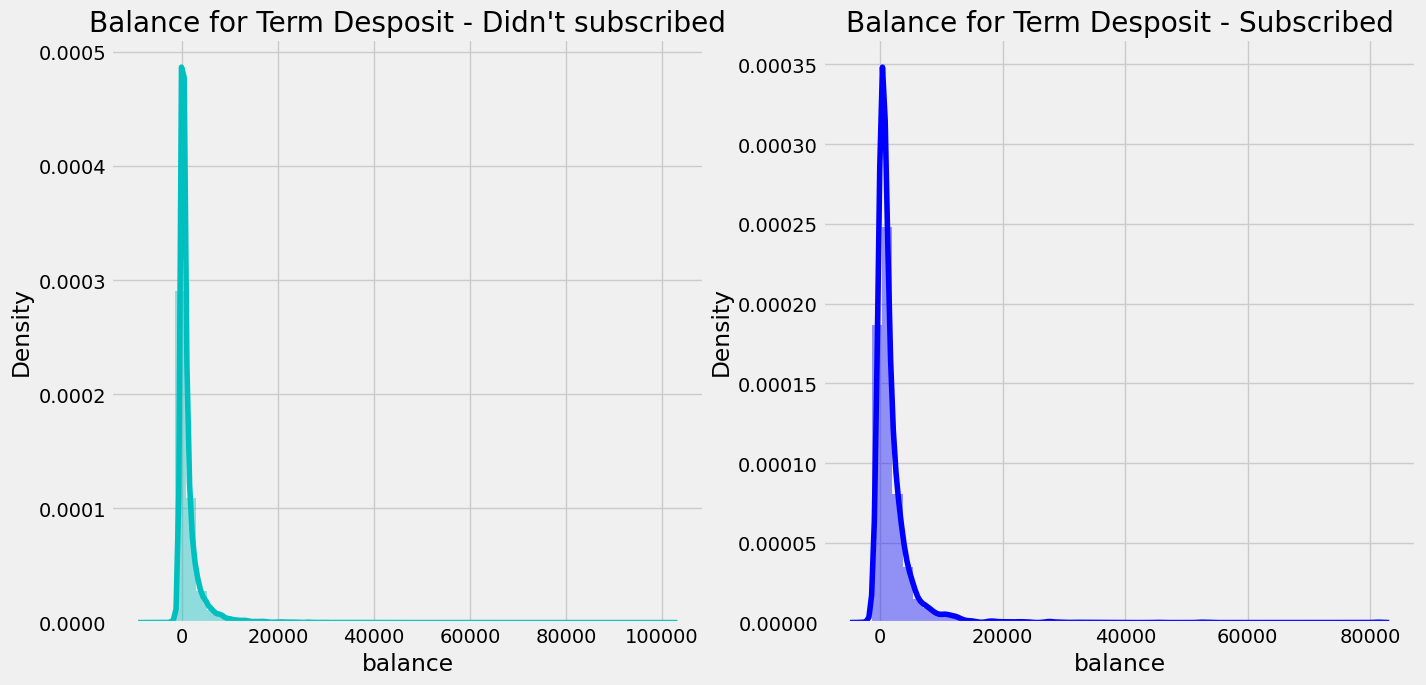

In [ ]:
#Cell 12
# Outlier, distribution for 'balance' column
Q3 = bank['balance'].quantile(0.75)
Q1 = bank['balance'].quantile(0.25)
IQR = Q3 - Q1
print('Balance column', '--'*55)
display(bank.loc[(bank['balance'] < (Q1 - 1.5 * IQR)) | (bank['balance'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'balance')

# Distribution of 'balance' by 'Target'
target_plot(bank, 'balance')

Duration column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,2,0,-3,0,0,unknown,5,5,1666,1,-1,0,unknown,0
43,54,retired,married,2,0,529,1,0,unknown,5,5,1492,1,-1,0,unknown,0
53,42,admin.,single,2,0,-76,1,0,unknown,5,5,787,1,-1,0,unknown,0
59,46,services,married,1,0,179,1,0,unknown,5,5,1778,1,-1,0,unknown,0
61,53,technician,divorced,2,0,989,1,0,unknown,5,5,812,1,-1,0,unknown,0


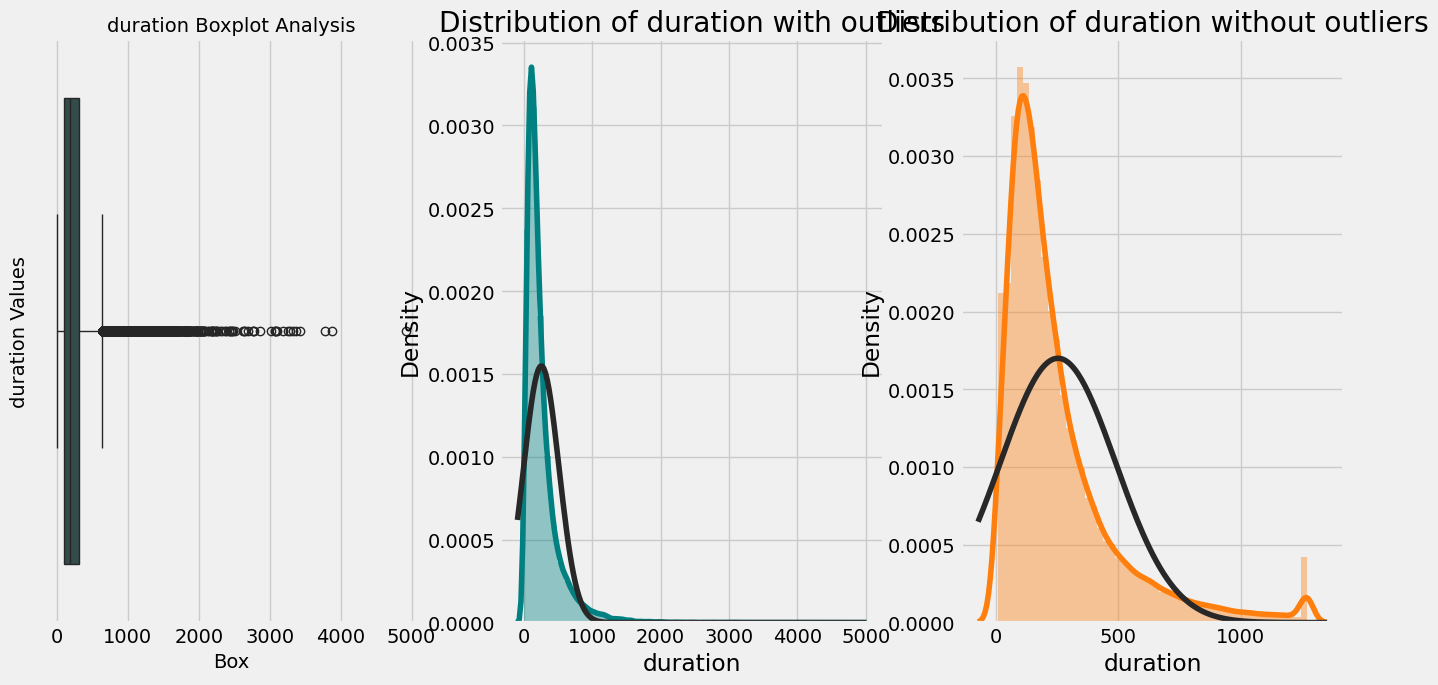

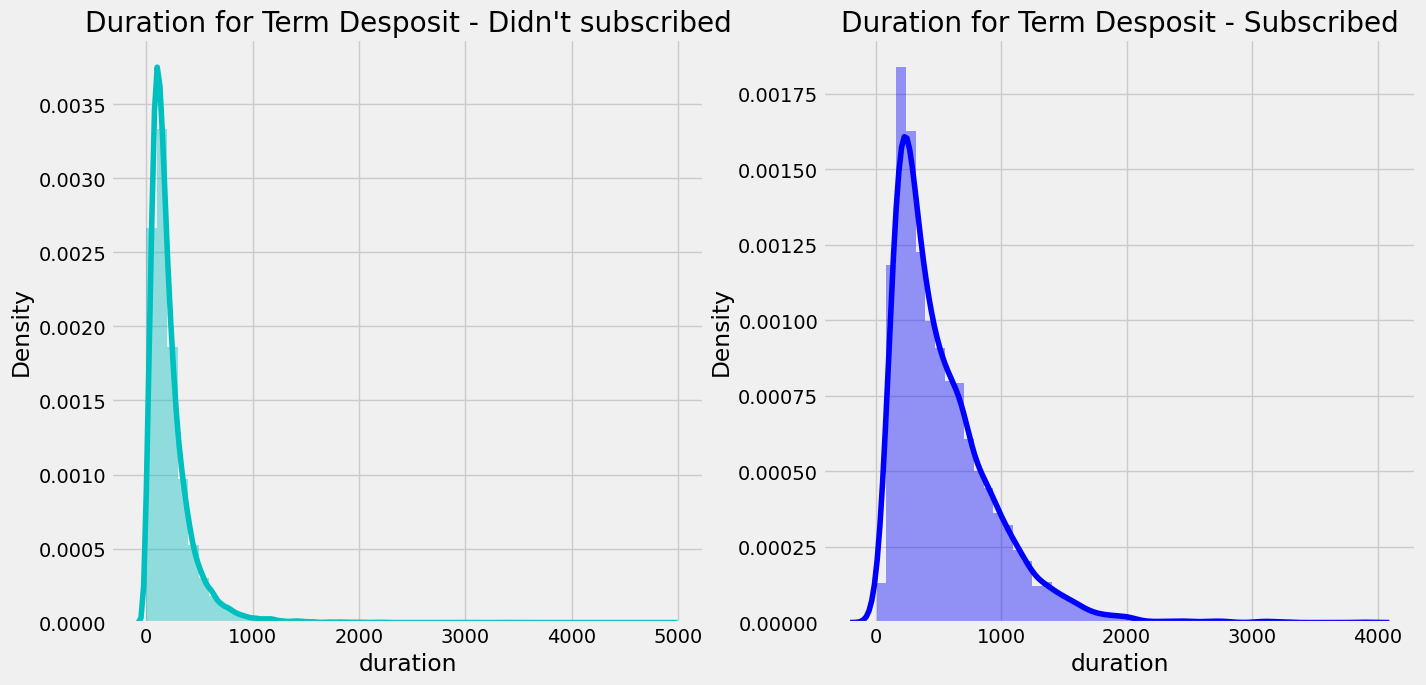

In [ ]:
#Cell 13
# Outlier, distribution for 'duration' column
Q3 = bank['duration'].quantile(0.75)
Q1 = bank['duration'].quantile(0.25)
IQR = Q3 - Q1

print('Duration column', '--'*54)
display(bank.loc[(bank['duration'] < (Q1 - 1.5 * IQR)) | (bank['duration'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'duration')

# Distribution of 'duration' by 'Target'
target_plot(bank, 'duration')

Campaign column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
758,59,services,married,2,0,307,1,1,unknown,6,5,250,7,-1,0,unknown,0
780,30,admin.,married,2,0,4,0,0,unknown,7,5,172,8,-1,0,unknown,0
906,27,services,single,2,0,0,1,0,unknown,7,5,388,7,-1,0,unknown,0
1103,52,technician,married,-1,0,133,1,0,unknown,7,5,253,8,-1,0,unknown,0
1105,43,admin.,married,3,0,1924,1,0,unknown,7,5,244,7,-1,0,unknown,0


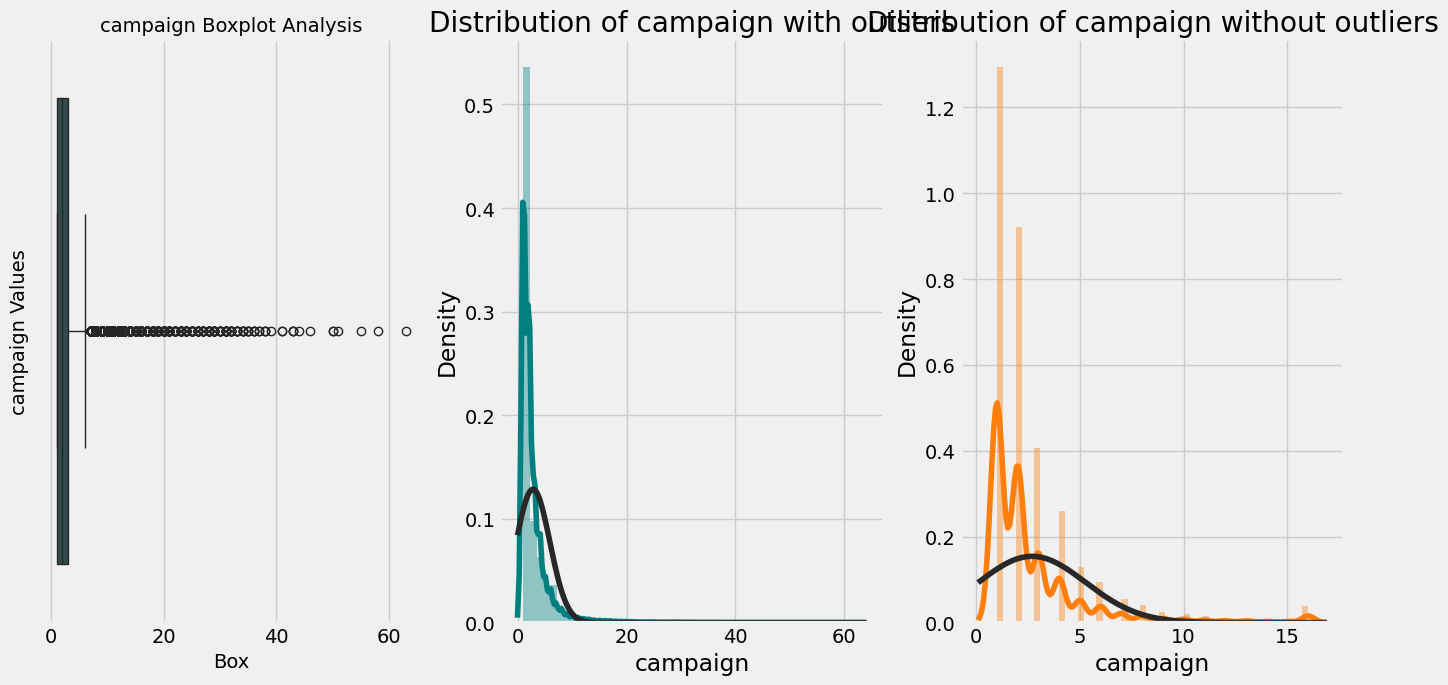

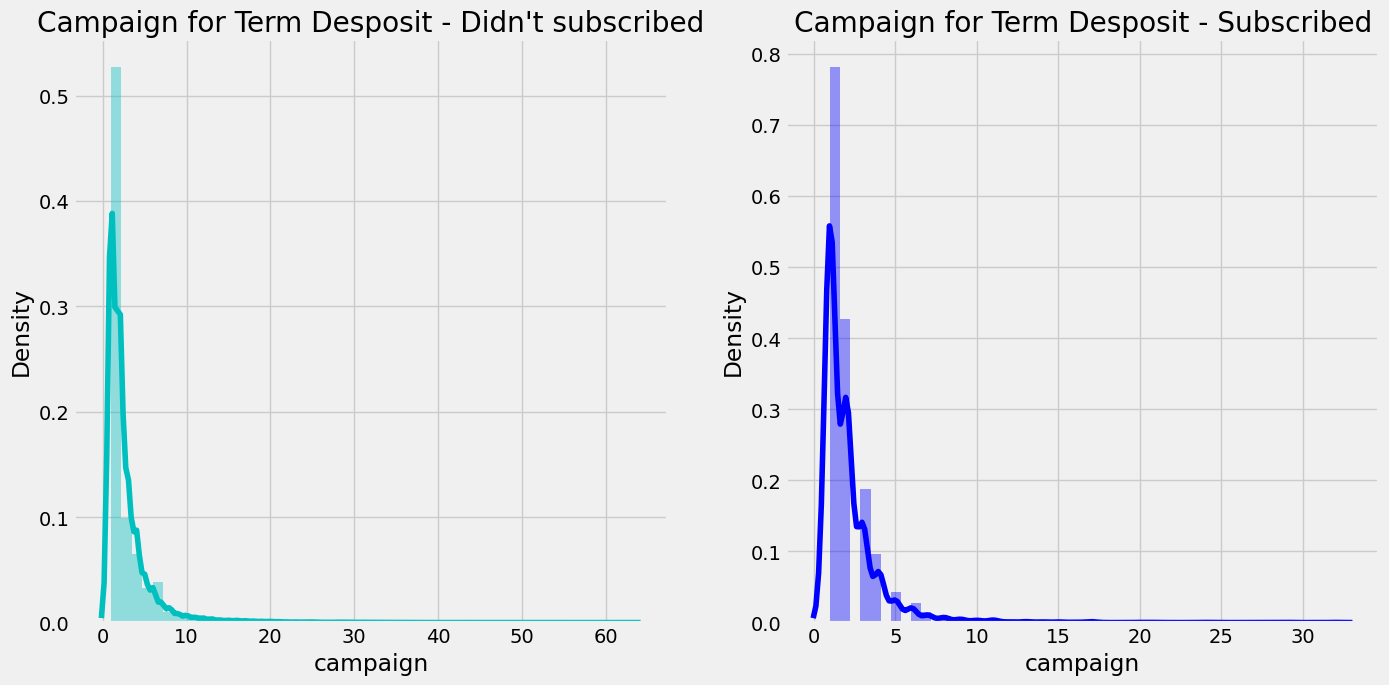

In [ ]:
#Cell 14
# Outlier, distribution for 'campaign' column
Q3 = bank['campaign'].quantile(0.75)
Q1 = bank['campaign'].quantile(0.25)
IQR = Q3 - Q1

print('Campaign column', '--'*54)
display(bank.loc[(bank['campaign'] < (Q1 - 1.5 * IQR)) | (bank['campaign'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'campaign')

# Distribution of 'campaign' by 'Target'
target_plot(bank, 'campaign')

Pdays column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1


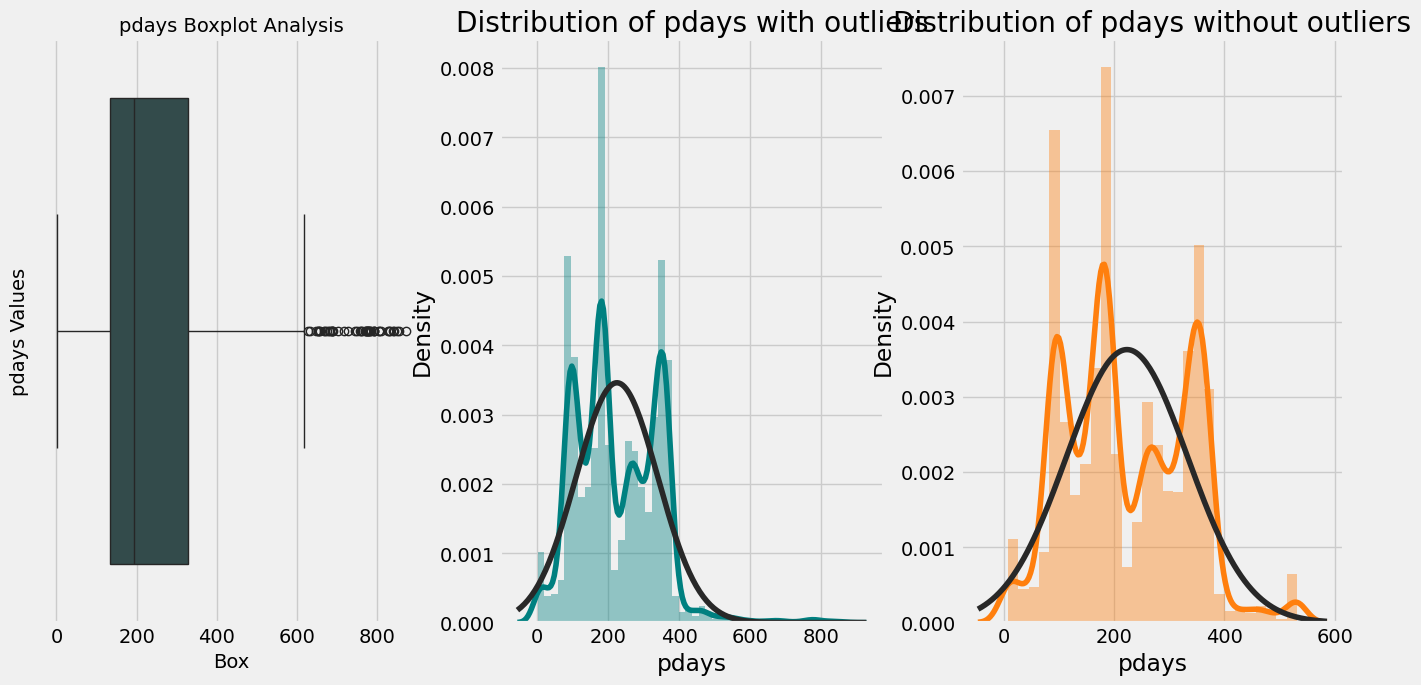

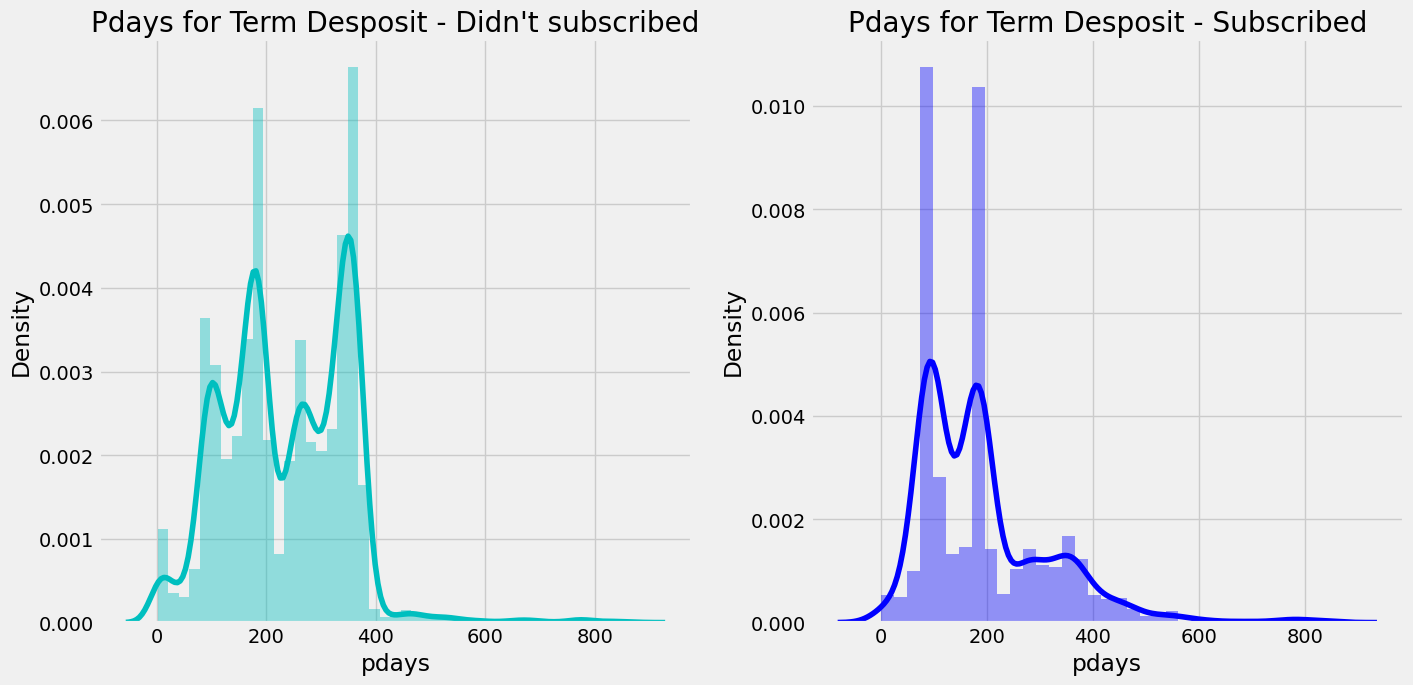

In [ ]:
#Cell 15
# Outlier, distribution for 'pdays' column
Q3 = bank['pdays'].quantile(0.75)
Q1 = bank['pdays'].quantile(0.25)
IQR = Q3 - Q1

print('Pdays column', '--'*55)
display(bank.loc[(bank['pdays'] < (Q1 - 1.5 * IQR)) | (bank['pdays'] > (Q3 + 1.5 * IQR))].head())

# Check outlier in 'pdays', not considering -1
pdays = bank.loc[bank['pdays'] > 0, ['pdays', 'Target']]
pdays = pd.DataFrame(pdays, columns = ['pdays', 'Target'])
odp_plots(pdays, 'pdays')

# Distribution of 'pdays' by 'Target', not considering -1
target_plot(pdays, 'pdays')

Previous column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1


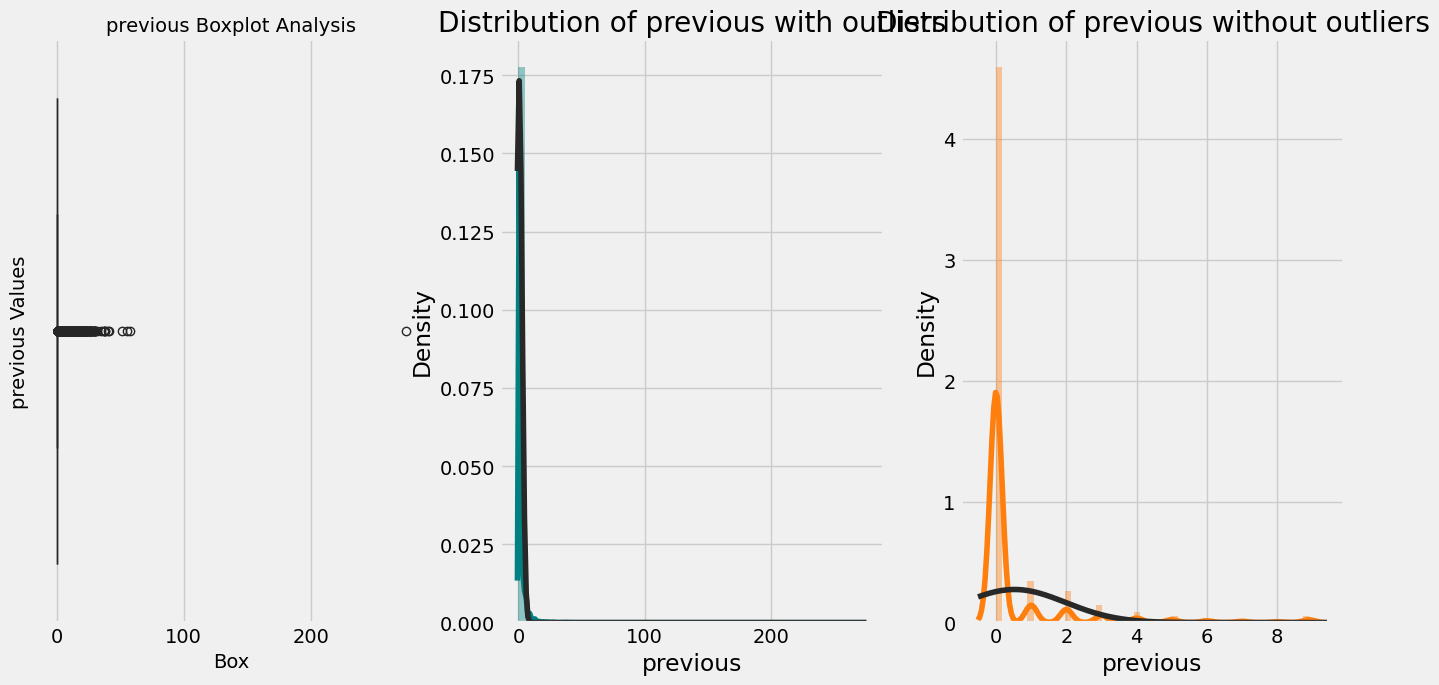

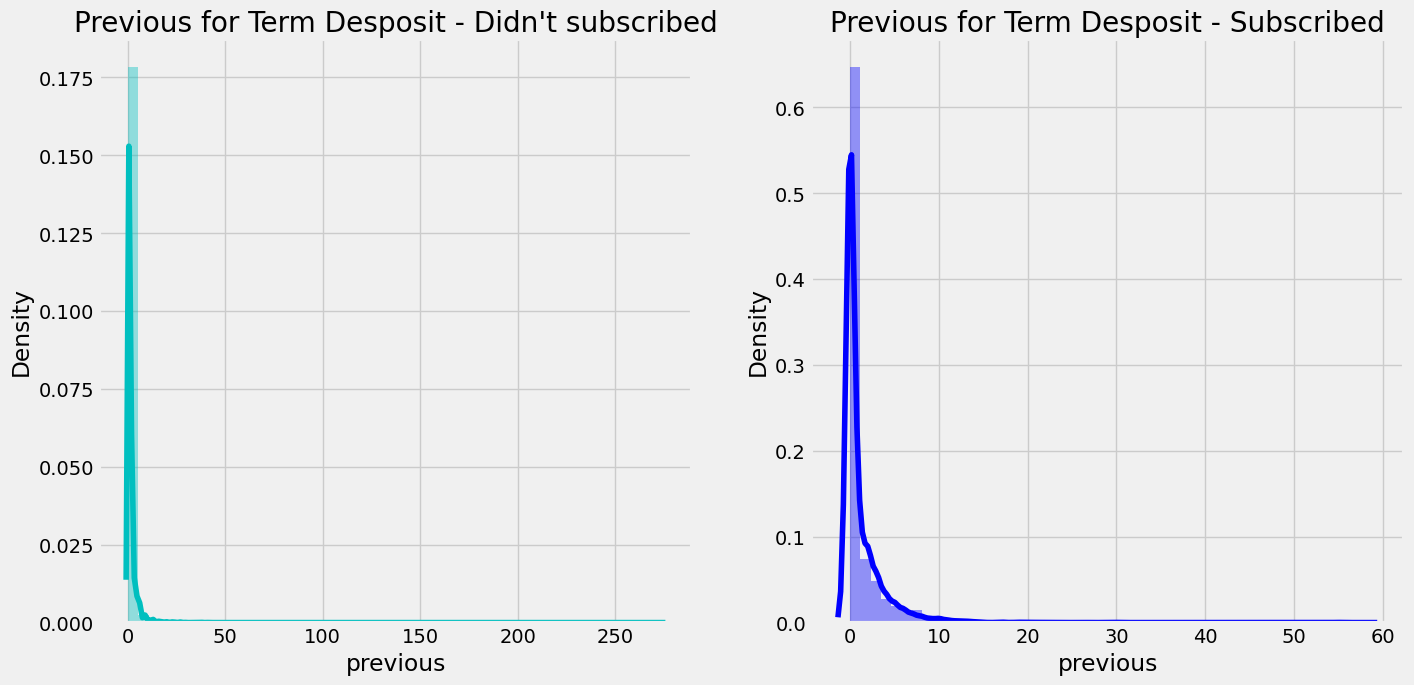

In [ ]:
#Cell 16
# Outlier, distribution and probability plot for 'previous' column
Q3 = bank['previous'].quantile(0.75)
Q1 = bank['previous'].quantile(0.25)
IQR = Q3 - Q1

print('Previous column', '--'*54)
display(bank.loc[(bank['previous'] < (Q1 - 1.5 * IQR)) | (bank['previous'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'previous')

# Distribution of 'previous' by 'Target'
target_plot(bank, 'previous')

In [ ]:
#Cell 17
print('Categorical Columns: \n{}'.format(list(bank.select_dtypes('category').columns)))
print('\nNumerical Columns: \n{}'.format(list(bank.select_dtypes(exclude = 'category').columns)))

Categorical Columns: 
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'Target']

Numerical Columns: 
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
#Cell 18
# Removing outliers with upper and lower percentile values being 99 and 1, respectively
bank_nulls = bank.copy(deep = True)
columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in columns:
    upper_lim = np.percentile(bank_nulls[col].values, 99)
    lower_lim = np.percentile(bank_nulls[col].values, 1)
    bank_nulls.loc[(bank_nulls[col] > upper_lim), col] = np.nan
    bank_nulls.loc[(bank_nulls[col] < lower_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', columns)

Column for which outliers where removed with upper and lower percentile values: 
 ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
#Cell 19
# pd.get_dummies
cols_to_transform = ['job', 'marital', 'contact', 'poutcome']
bank_nulls = pd.get_dummies(bank_nulls, columns = cols_to_transform) #, drop_first = True)

print('Got dummies for \n', cols_to_transform)
bank_nulls.info()

Got dummies for 
 ['job', 'marital', 'contact', 'poutcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                44473 non-null  float64 
 1   education          45211 non-null  category
 2   default            45211 non-null  category
 3   balance            44308 non-null  float64 
 4   housing            45211 non-null  category
 5   loan               45211 non-null  category
 6   day                45211 non-null  category
 7   month              45211 non-null  category
 8   duration           44341 non-null  float64 
 9   campaign           44760 non-null  float64 
 10  pdays              44826 non-null  float64 
 11  previous           44758 non-null  float64 
 12  Target             45211 non-null  category
 13  job_admin.         45211 non-null  bool    
 14  job_blue-collar    45211 non-null  bool   

In [ ]:
#Cell 20
# Convert 'astype' of categorical columns to integer for getting it ready for MICE
columns = ['education', 'default', 'housing', 'loan', 'day', 'month', 'Target']
for col in columns:
    bank_nulls[col] = bank_nulls[col].astype('float')

In [ ]:
#Cell 21
!pip install fancyimpute
from fancyimpute import IterativeImputer

# Assuming bank_nulls is your DataFrame with missing values
imputer = IterativeImputer()
bank_imputed = imputer.fit_transform(bank_nulls)

# Convert the imputed array back to a DataFrame
bank_imputed = pd.DataFrame(bank_imputed, columns=bank_nulls.columns)

# Display the descriptions
display(bank.describe(include='all').T, bank_imputed.describe(include='all').T)


  Preparing metadata (setup.py) ... done


In [ ]:
#Cell 22
# Checking whether count of 0 in previous is equal to count of -1 in pdays
display(bank_imputed.loc[bank_imputed['previous'] == 0, 'previous'].value_counts().sum(),
        bank_imputed.loc[bank_imputed['pdays'] == -1, 'pdays'].value_counts().sum())

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7839a0f19000> (for post_execute):


KeyboardInterrupt: 

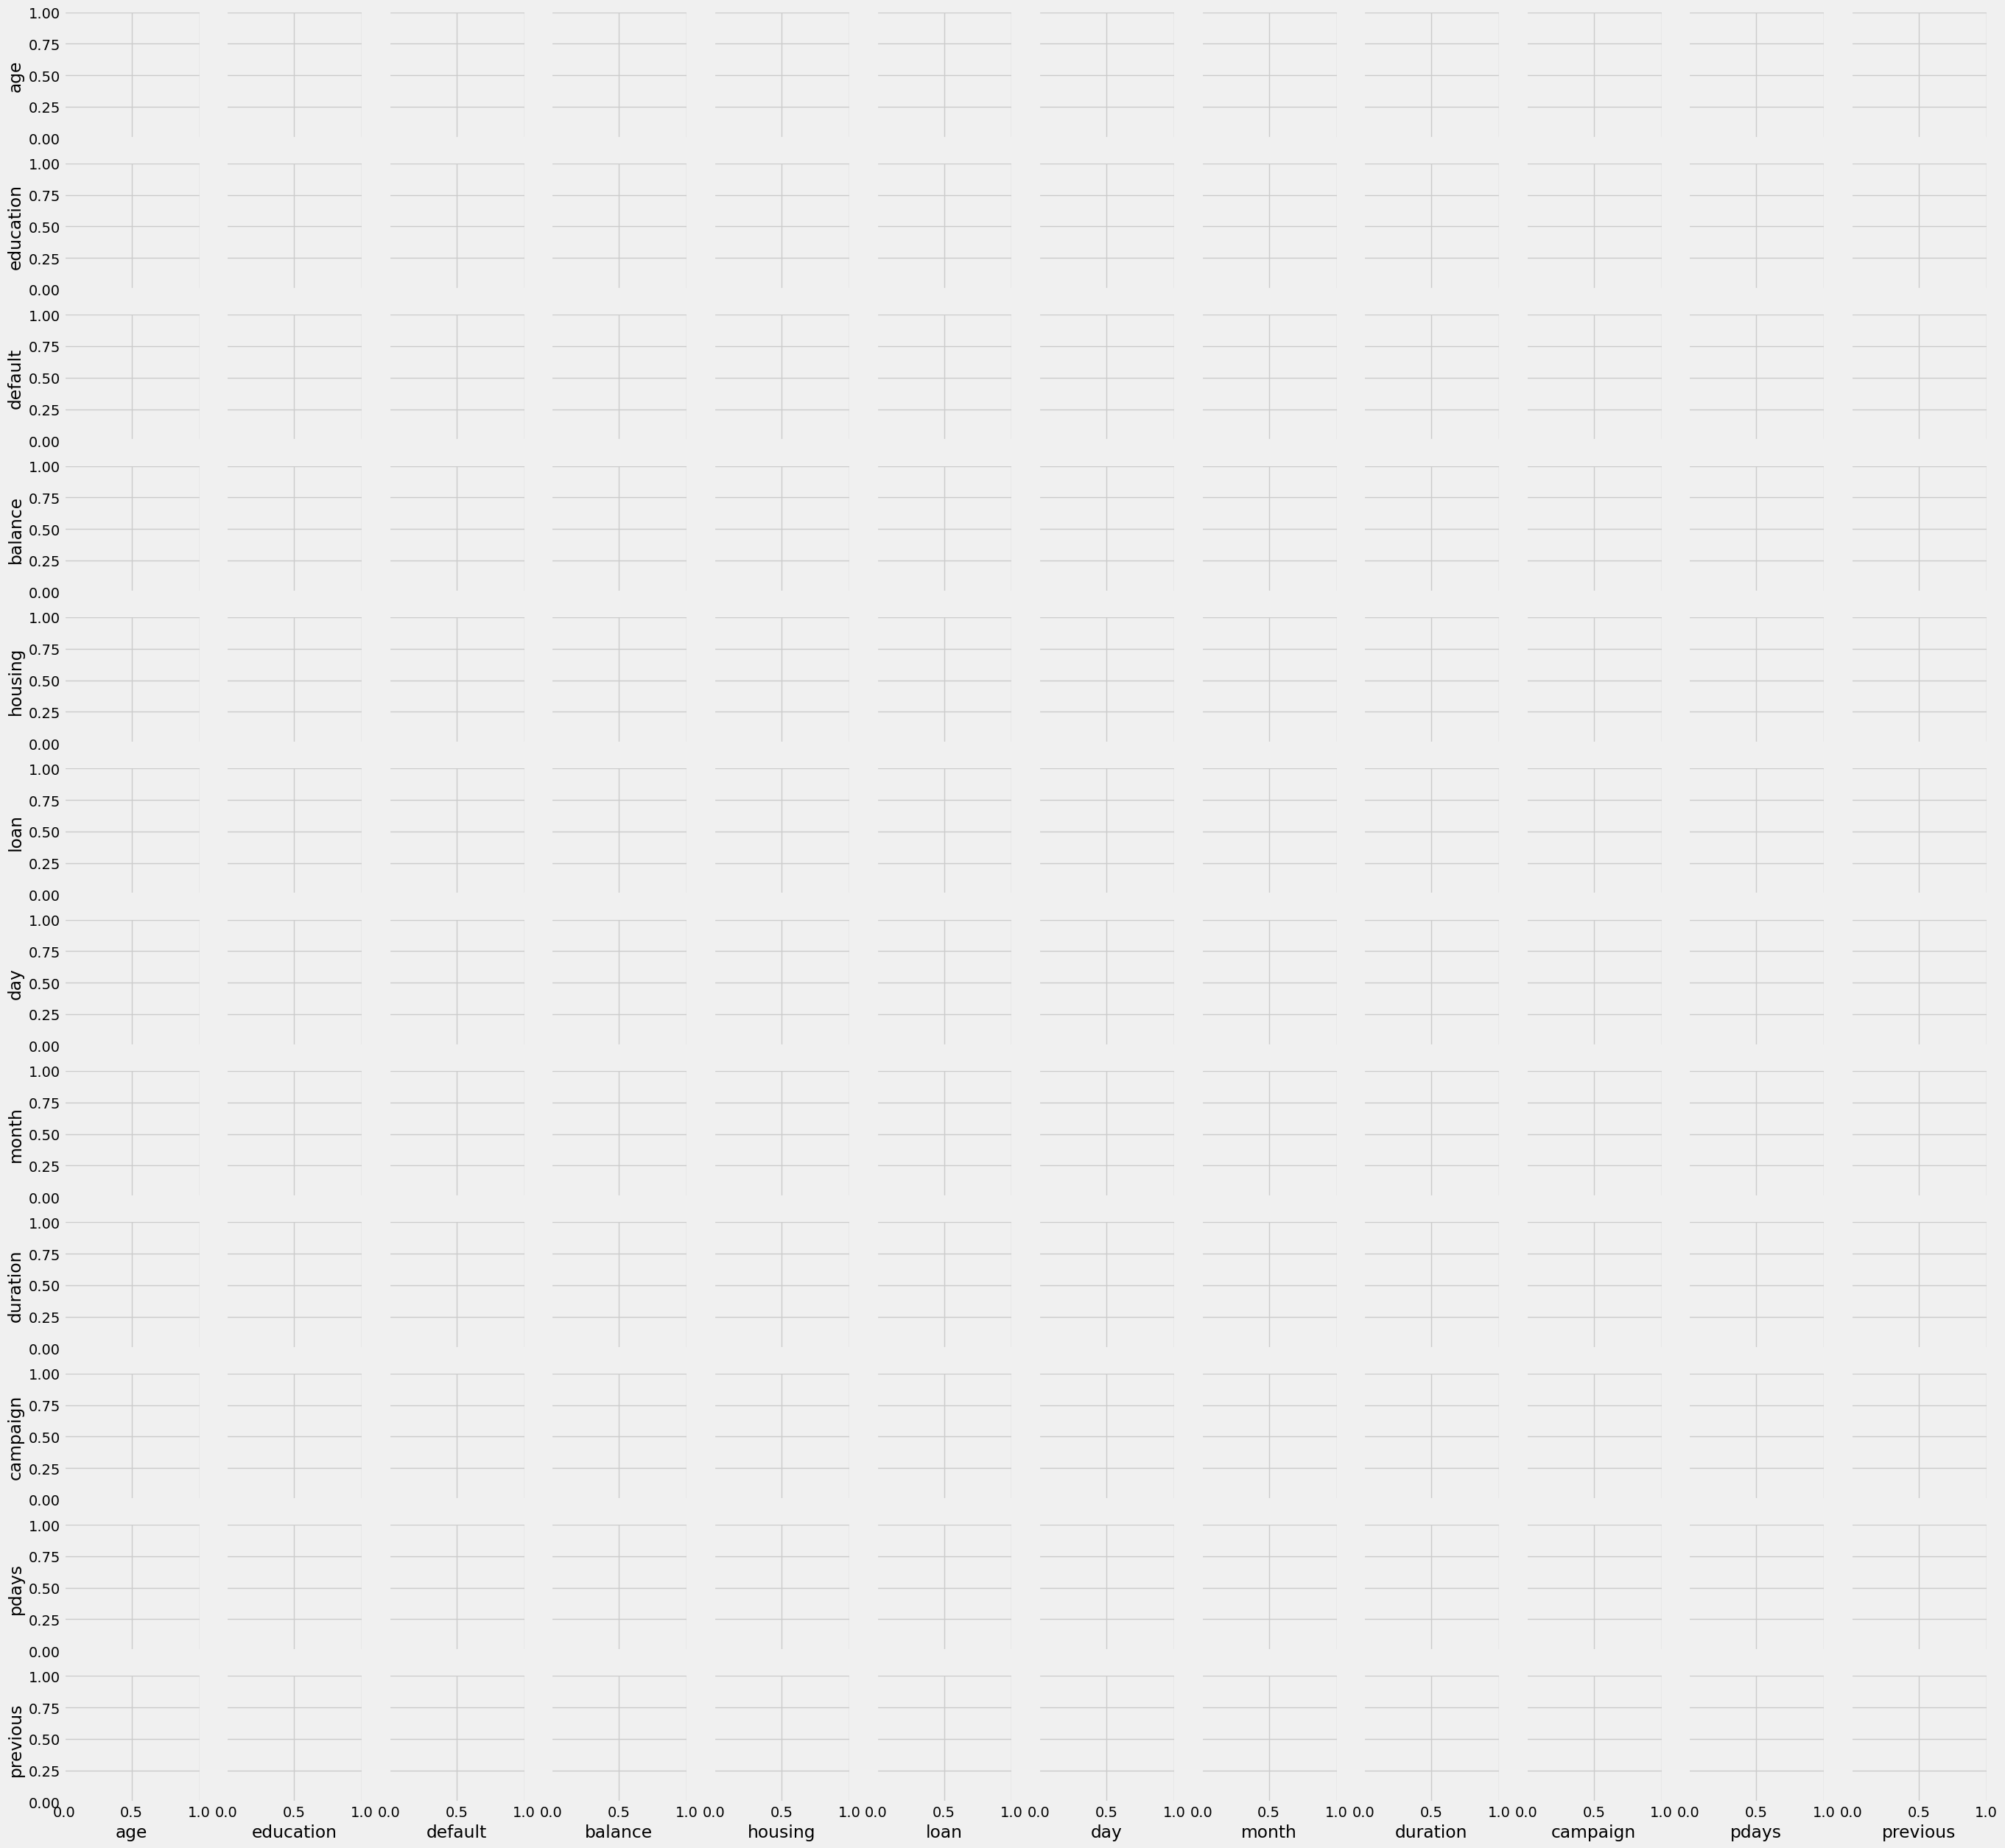

In [ ]:
#Cell 23
img = sns.pairplot(bank_imputed[['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month',
                           'duration', 'campaign', 'pdays', 'previous', 'Target']], hue = 'Target')

In [ ]:
#Cell 24
corr = bank_imputed.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix of Data')
plt.show()

In [ ]:
#Cell 25
# Filter for correlation value greater than 0.8 and less than 1
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.8) & (sort < 1)]

In [ ]:
#Cell 26
# Absolute correlation of independent variables with 'Target' i.e. the target variable
absCorrwithDep = []
allVars = bank_imputed.drop('Target', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bank_imputed['Target'].corr(bank_imputed[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,duration,0.398044
32,poutcome_success,0.306788
33,poutcome_unknown,0.167051
11,previous,0.153338
29,contact_unknown,0.150935
4,housing,0.139173
27,contact_cellular,0.135873
10,pdays,0.086591
17,job_retired,0.079245
3,balance,0.076904


In [ ]:
#Cell 27
# Creating age groups
bank_imputed.loc[(bank_imputed['age'] < 30), 'age_group'] = 20
bank_imputed.loc[(bank_imputed['age'] >= 30) & (bank_imputed['age'] < 40), 'age_group'] = 30
bank_imputed.loc[(bank_imputed['age'] >= 40) & (bank_imputed['age'] < 50), 'age_group'] = 40
bank_imputed.loc[(bank_imputed['age'] >= 50) & (bank_imputed['age'] < 60), 'age_group'] = 50
bank_imputed.loc[(bank_imputed['age'] >= 60), 'age_group'] = 60

Text(0.5, 1.0, 'Relationship between balance and age group by Target')

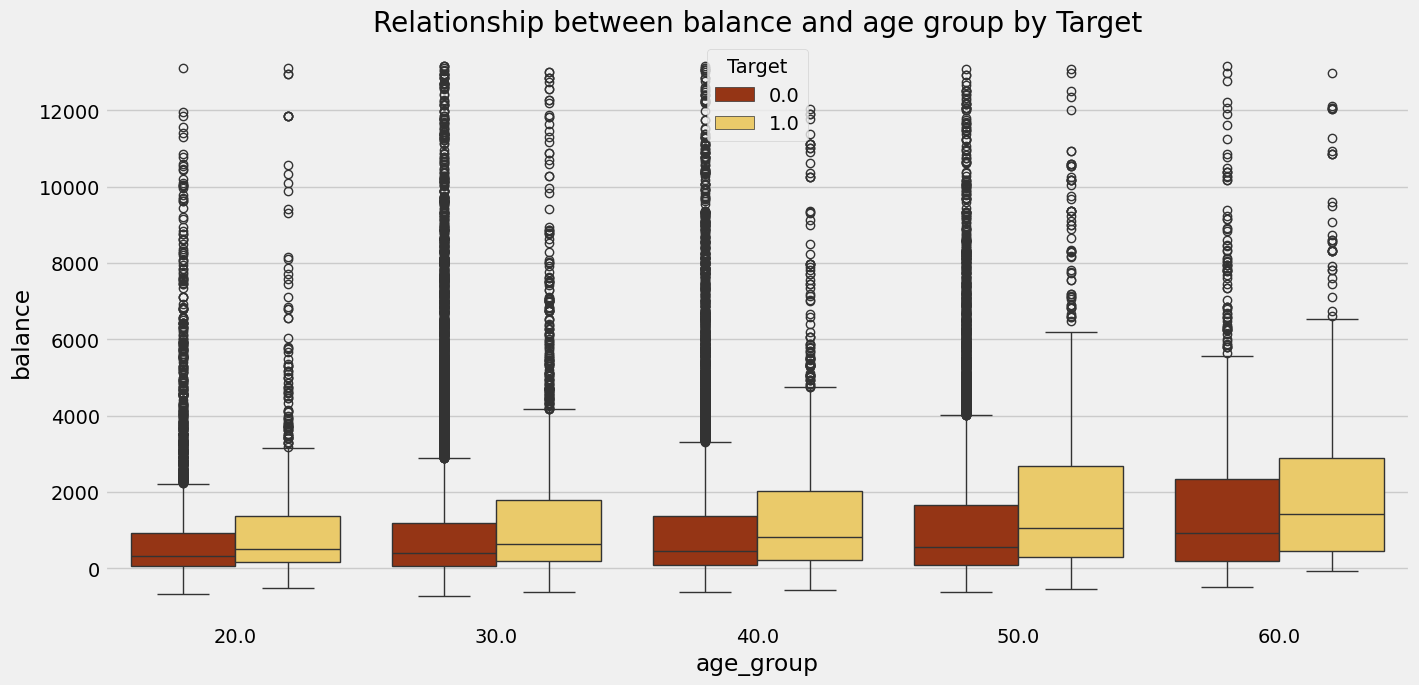

In [ ]:
#Cell 28
# Check relationship between balance and age group by Target
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(x = 'age_group', y = 'balance', hue = 'Target', palette = 'afmhot', data = bank_imputed)
ax.set_title('Relationship between balance and age group by Target')

Text(0.5, 1.0, 'Relationship between campaign and age group by Target')

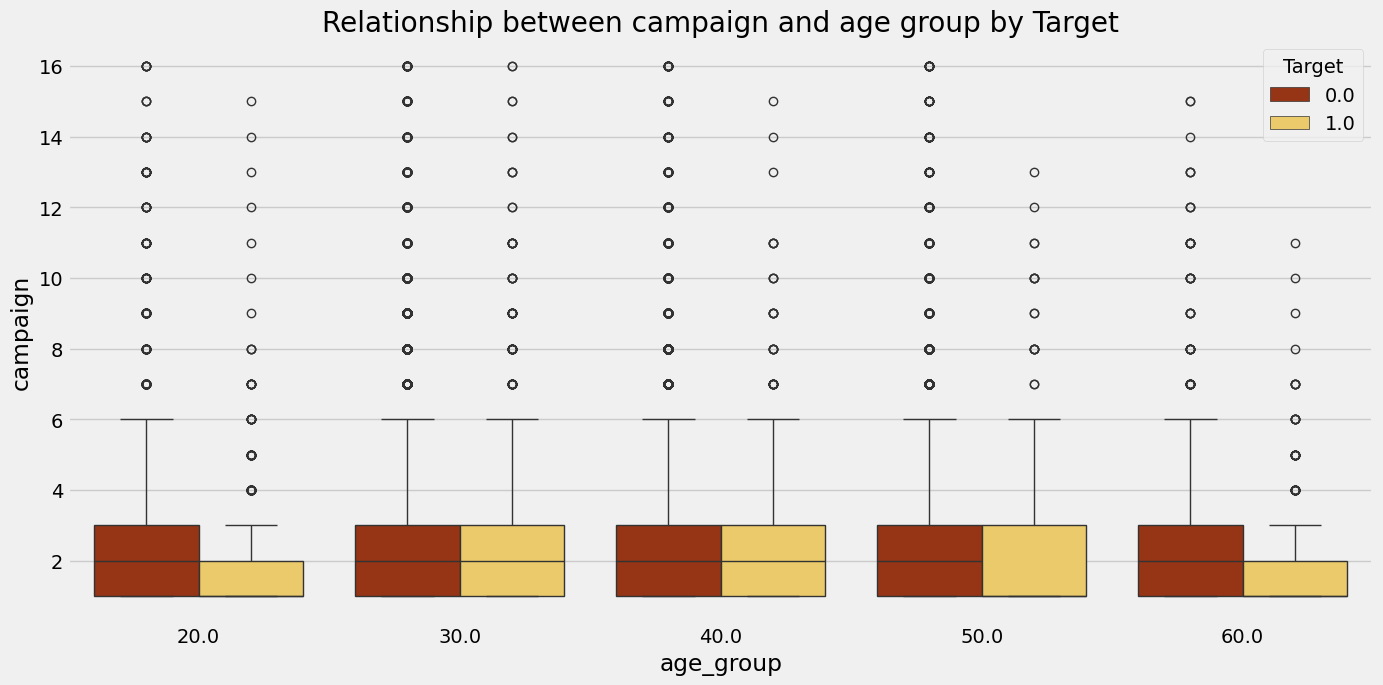

In [ ]:
#Cell 29
# Check relationship between campaign and age group by Target
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(x = 'age_group', y = 'campaign', hue = 'Target', palette = 'afmhot', data = bank_imputed)
ax.set_title('Relationship between campaign and age group by Target')

#Baseline Model


In [ ]:
#Cell 30

from sklearn.metrics import log_loss

# Separating dependent and independent variables
X = bank_imputed.drop(['Target'], axis = 1)
y = bank_imputed['Target']

# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

dummy = DummyClassifier(strategy='most_frequent', random_state=random_state)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

accuracy_ = accuracy_score(y_test, y_pred)
pre_s = precision_score(y_test, y_pred, average='binary', pos_label=1)
re_s = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1_s = f1_score(y_test, y_pred, average='binary', pos_label=1)


print('Training Score: ', dummy.score(X_train, y_train).round(3))
print('Test Score: ', dummy.score(X_test, y_test).round(3))

print('Accuracy: ', accuracy_.round(3))
print('Precision Score - Subscribe: ', pre_s.round(3))
print('Recall Score - Subscribe: ', re_s.round(3))
print('f1 Score - Subscribe: ', f1_s.round(3))


y_prob = dummy.predict_proba(X_test)[:, 1]
y_test_numerical = y_test.replace({'no': 0, 'yes': 1})
log_loss_val = log_loss(y_test_numerical, y_prob).round(3)
print('Log Loss:', log_loss_val)

df = pd.DataFrame([accuracy_.round(3), pre_s.round(3), re_s.round(3),
                   f1_s.round(3), log_loss_val], columns=['Baseline Model']).T
df.columns = ['Accuracy', 'Precision_Subscribe',
              'Recall_Subscribe', 'f1_Subscribe', 'Log_Loss']
df


Training Score:  0.883
Test Score:  0.882
Accuracy:  0.882
Precision Score - Subscribe:  0.0
Recall Score - Subscribe:  0.0
f1 Score - Subscribe:  0.0
Log Loss: 4.246


,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Baseline Model,0.882,0.0,0.0,0.0,4.246


In [ ]:
#Cell 31
from sklearn.metrics import log_loss

def train_and_predict(n_splits, base_model, X, y, name, subscribe=1, oversampling=False):
    features = X.columns
    X = np.array(X)
    y = np.array(y)

    folds = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state).split(X, y))

    train_pred = np.zeros((X.shape[0], len(base_model)))

    accuracy = []
    precision_subscribe = []
    recall_subscribe = []
    f1_subscribe = []
    log_loss_list = []

    for i, clf in enumerate(base_model):
        for j, (train, test) in enumerate(folds):

            # Creating train and test sets
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]

            if oversampling:
                sm = SMOTE(random_state=random_state, sampling_strategy='minority')
                X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

                # fit the model
                clf.fit(X_train_res, y_train_res)

                # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)
                y_prob = clf.predict_proba(X_test)

                # Evaluate train and test scores
                train_ = clf.score(X_train_res, y_train_res)
                test_ = clf.score(X_test, y_test)

            else:
                # fit the model
                clf.fit(X_train, y_train)

                # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)
                y_prob = clf.predict_proba(X_test)

                # Evaluate train and test scores
                train_ = clf.score(X_train, y_train)
                test_ = clf.score(X_test, y_test)

            # Other scores
            accuracy_ = accuracy_score(y_true, y_pred).round(3)
            precision_b = precision_score(y_true, y_pred, average='binary', pos_label=subscribe).round(3)
            recall_b = recall_score(y_true, y_pred, average='binary', pos_label=subscribe).round(3)
            f1_b = f1_score(y_true, y_pred, average='binary', pos_label=subscribe).round(3)
            log_loss_val = log_loss(y_true, y_prob).round(3)

            # Appending scores
            accuracy.append(accuracy_)
            precision_subscribe.append(precision_b)
            recall_subscribe.append(recall_b)
            f1_subscribe.append(f1_b)
            log_loss_list.append(log_loss_val)

            print(f'Model- {name.capitalize()} and CV- {j}')
            print('-' * 20)
            print('Training Score: {0:.3f}'.format(train_))
            print('Test Score: {0:.3f}'.format(test_))
            print('Accuracy Score: {0:.3f}'.format(accuracy_))
            print('Precision Score - Subscribe: {0:.3f}'.format(precision_b))
            print('Recall Score - Subscribe: {0:.3f}'.format(recall_b))
            print('f1 Score - Subscribe: {0:.3f}'.format(f1_b))
            print('Log Loss: {0:.3f}'.format(log_loss_val))
            print('\n')

    # Creating a dataframe of scores outside the loop
    df = pd.DataFrame([np.mean(accuracy).round(3), np.mean(precision_subscribe).round(3),
                       np.mean(recall_subscribe).round(3),
                       np.mean(f1_subscribe).round(3),
                       np.mean(log_loss_list).round(3)], columns=[name]).T
    df.columns = ['Accuracy', 'Precision_Subscribe', 'Recall_Subscribe', 'f1_Subscribe', 'Log_Loss']

    return df


# Decision Tree Classifier

In [ ]:
#Cell 32
# Decision Tree Classifier
dt_hyper = DecisionTreeClassifier(max_depth = 3, random_state = random_state)
base_model = [dt_hyper]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Decision Tree')
df = df._append(df1)
df

Model- Decision tree and CV- 0
--------------------
Training Score: 0.898
Test Score: 0.902
Accuracy Score: 0.902
Precision Score - Subscribe: 0.674
Recall Score - Subscribe: 0.313
f1 Score - Subscribe: 0.427
Log Loss: 0.268


Model- Decision tree and CV- 1
--------------------
Training Score: 0.900
Test Score: 0.898
Accuracy Score: 0.898
Precision Score - Subscribe: 0.665
Recall Score - Subscribe: 0.250
f1 Score - Subscribe: 0.363
Log Loss: 0.274


Model- Decision tree and CV- 2
--------------------
Training Score: 0.899
Test Score: 0.897
Accuracy Score: 0.897
Precision Score - Subscribe: 0.611
Recall Score - Subscribe: 0.325
f1 Score - Subscribe: 0.424
Log Loss: 0.271


Model- Decision tree and CV- 3
--------------------
Training Score: 0.899
Test Score: 0.898
Accuracy Score: 0.898
Precision Score - Subscribe: 0.639
Recall Score - Subscribe: 0.298
f1 Score - Subscribe: 0.406
Log Loss: 0.269


Model- Decision tree and CV- 4
--------------------
Training Score: 0.900
Test Score: 0.896


,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Baseline Model,0.882,0.000,0.000,0.000,4.246
Decision Tree,0.898,0.647,0.288,0.397,0.272


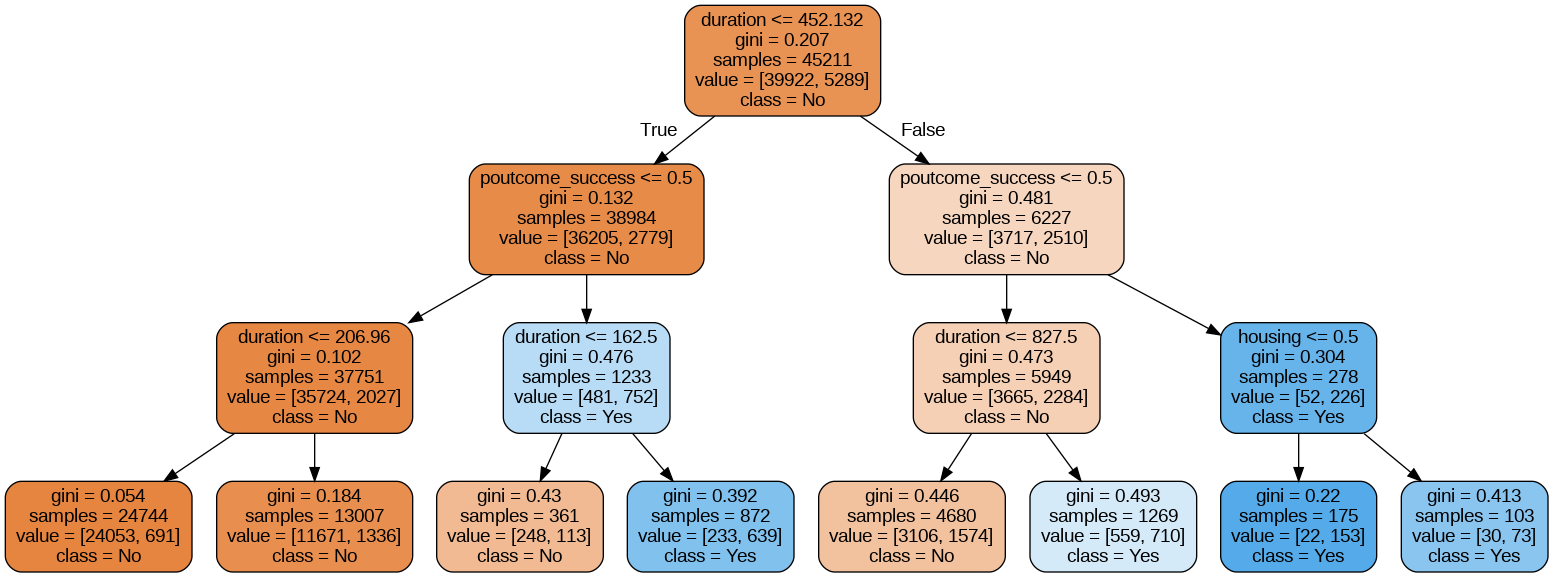

In [ ]:
#Cell 33
dt_hyper = DecisionTreeClassifier(max_depth = 3, random_state = random_state)
dt_hyper.fit(X, y)
decisiontree = open('decisiontree.dot','w')
dot_data = export_graphviz(dt_hyper, out_file = 'decisiontree.dot', feature_names = X.columns,
    class_names = ['No', 'Yes'], rounded = True, proportion = False, filled = True)
decisiontree.close()

retCode = system('dot -Tpng decisiontree.dot -o decisiontree.png')
if(retCode>0):
    print('system command returning error: '+str(retCode))
else:
    display(Image('decisiontree.png'))

Feature Importance for Decision Tree Classifier  ----------------------------------------------------------------------------


<Axes: >

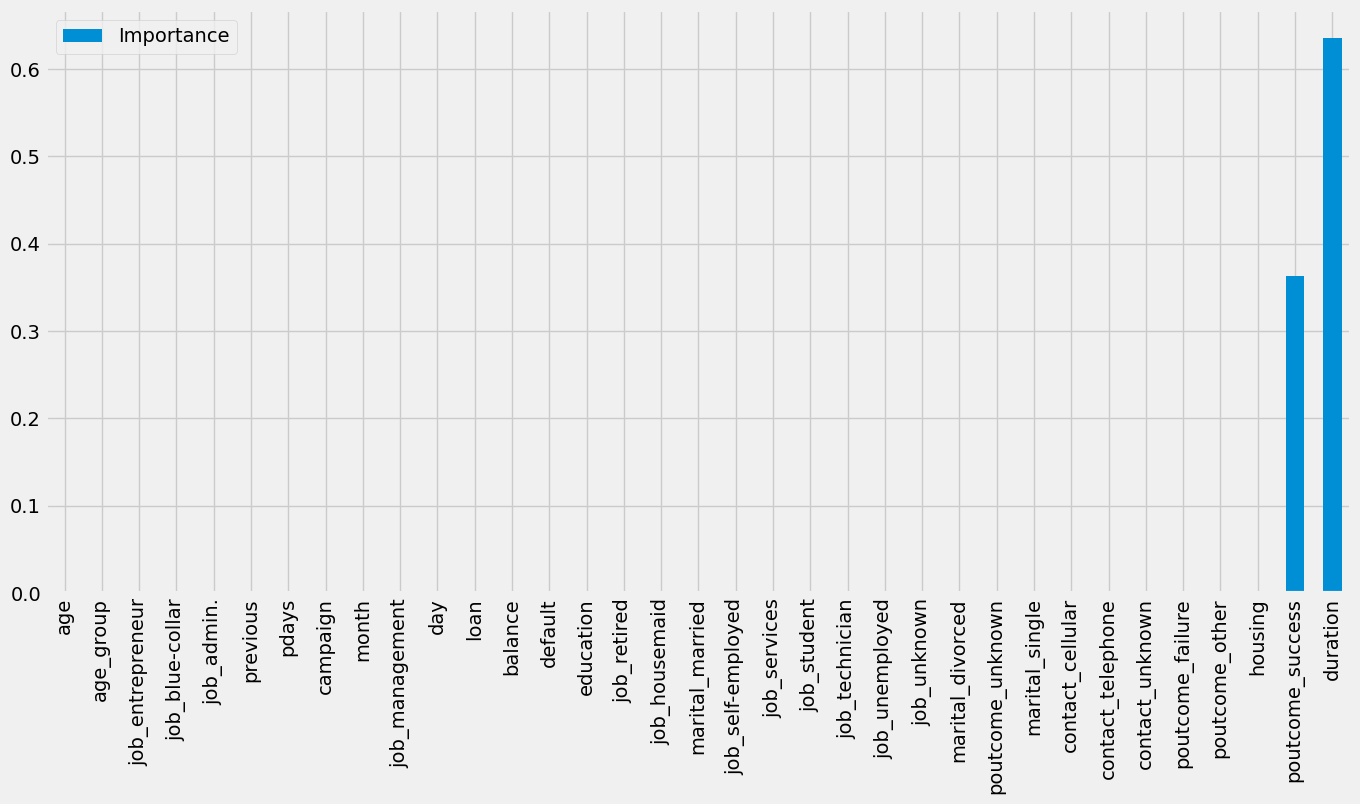

In [ ]:
#Cell 34
print('Feature Importance for Decision Tree Classifier ', '--'*38)
feature_importances = pd.DataFrame(dt_hyper.feature_importances_, index = X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'bar', figsize = (15, 7.2))

#Bagging Classifier

In [ ]:
#Cell 35
# Bagging Classifier
bgcl = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3, random_state = random_state),
                         n_estimators = 50, random_state = random_state)
base_model = [bgcl]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Bagging ')
df = df._append(df1)
df

Model- Bagging  and CV- 0
--------------------
Training Score: 0.898
Test Score: 0.901
Accuracy Score: 0.901
Precision Score - Subscribe: 0.665
Recall Score - Subscribe: 0.314
f1 Score - Subscribe: 0.426
Log Loss: 0.260


Model- Bagging  and CV- 1
--------------------
Training Score: 0.900
Test Score: 0.898
Accuracy Score: 0.898
Precision Score - Subscribe: 0.654
Recall Score - Subscribe: 0.269
f1 Score - Subscribe: 0.381
Log Loss: 0.269


Model- Bagging  and CV- 2
--------------------
Training Score: 0.900
Test Score: 0.900
Accuracy Score: 0.900
Precision Score - Subscribe: 0.662
Recall Score - Subscribe: 0.290
f1 Score - Subscribe: 0.403
Log Loss: 0.265


Model- Bagging  and CV- 3
--------------------
Training Score: 0.899
Test Score: 0.899
Accuracy Score: 0.899
Precision Score - Subscribe: 0.656
Recall Score - Subscribe: 0.283
f1 Score - Subscribe: 0.395
Log Loss: 0.265


Model- Bagging  and CV- 4
--------------------
Training Score: 0.900
Test Score: 0.895
Accuracy Score: 0.895
Pre

,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Baseline Model,0.882,0.000,0.000,0.000,4.246
Decision Tree,0.898,0.647,0.288,0.397,0.272
Bagging,0.899,0.650,0.286,0.397,0.267


#Gradient Boosting Classifier

In [ ]:
#Cell 36
# Gradient Boosting Classifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state = random_state)
base_model = [gbcl]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Gradient Boosting ')
df = df._append(df1)
df

Model- Gradient boosting  and CV- 0
--------------------
Training Score: 0.903
Test Score: 0.902
Accuracy Score: 0.902
Precision Score - Subscribe: 0.678
Recall Score - Subscribe: 0.310
f1 Score - Subscribe: 0.425
Log Loss: 0.225


Model- Gradient boosting  and CV- 1
--------------------
Training Score: 0.905
Test Score: 0.901
Accuracy Score: 0.901
Precision Score - Subscribe: 0.650
Recall Score - Subscribe: 0.328
f1 Score - Subscribe: 0.436
Log Loss: 0.230


Model- Gradient boosting  and CV- 2
--------------------
Training Score: 0.905
Test Score: 0.901
Accuracy Score: 0.901
Precision Score - Subscribe: 0.655
Recall Score - Subscribe: 0.324
f1 Score - Subscribe: 0.434
Log Loss: 0.231


Model- Gradient boosting  and CV- 3
--------------------
Training Score: 0.903
Test Score: 0.904
Accuracy Score: 0.904
Precision Score - Subscribe: 0.710
Recall Score - Subscribe: 0.301
f1 Score - Subscribe: 0.422
Log Loss: 0.227


Model- Gradient boosting  and CV- 4
--------------------
Training Score:

,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Baseline Model,0.882,0.000,0.000,0.000,4.246
Decision Tree,0.898,0.647,0.288,0.397,0.272
Bagging,0.899,0.650,0.286,0.397,0.267
Gradient Boosting,0.901,0.666,0.314,0.426,0.229


#Random Forest Classifier

In [ ]:
#Cell 37
# Random Forest Classifier
rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
base_model = [rfc]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Random Forest')
df = df._append(df1)
df

Model- Random forest and CV- 0
--------------------
Training Score: 1.000
Test Score: 0.902
Accuracy Score: 0.902
Precision Score - Subscribe: 0.657
Recall Score - Subscribe: 0.342
f1 Score - Subscribe: 0.450
Log Loss: 0.224


Model- Random forest and CV- 1
--------------------
Training Score: 1.000
Test Score: 0.898
Accuracy Score: 0.898
Precision Score - Subscribe: 0.630
Recall Score - Subscribe: 0.318
f1 Score - Subscribe: 0.423
Log Loss: 0.226


Model- Random forest and CV- 2
--------------------
Training Score: 1.000
Test Score: 0.901
Accuracy Score: 0.901
Precision Score - Subscribe: 0.654
Recall Score - Subscribe: 0.334
f1 Score - Subscribe: 0.442
Log Loss: 0.233


Model- Random forest and CV- 3
--------------------
Training Score: 1.000
Test Score: 0.905
Accuracy Score: 0.905
Precision Score - Subscribe: 0.703
Recall Score - Subscribe: 0.329
f1 Score - Subscribe: 0.448
Log Loss: 0.223


Model- Random forest and CV- 4
--------------------
Training Score: 1.000
Test Score: 0.900


,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Baseline Model,0.882,0.000,0.000,0.000,4.246
Decision Tree,0.898,0.647,0.288,0.397,0.272
Bagging,0.899,0.650,0.286,0.397,0.267
Gradient Boosting,0.901,0.666,0.314,0.426,0.229
Random Forest,0.901,0.656,0.334,0.442,0.228
Random Forest,0.901,0.656,0.334,0.442,0.228


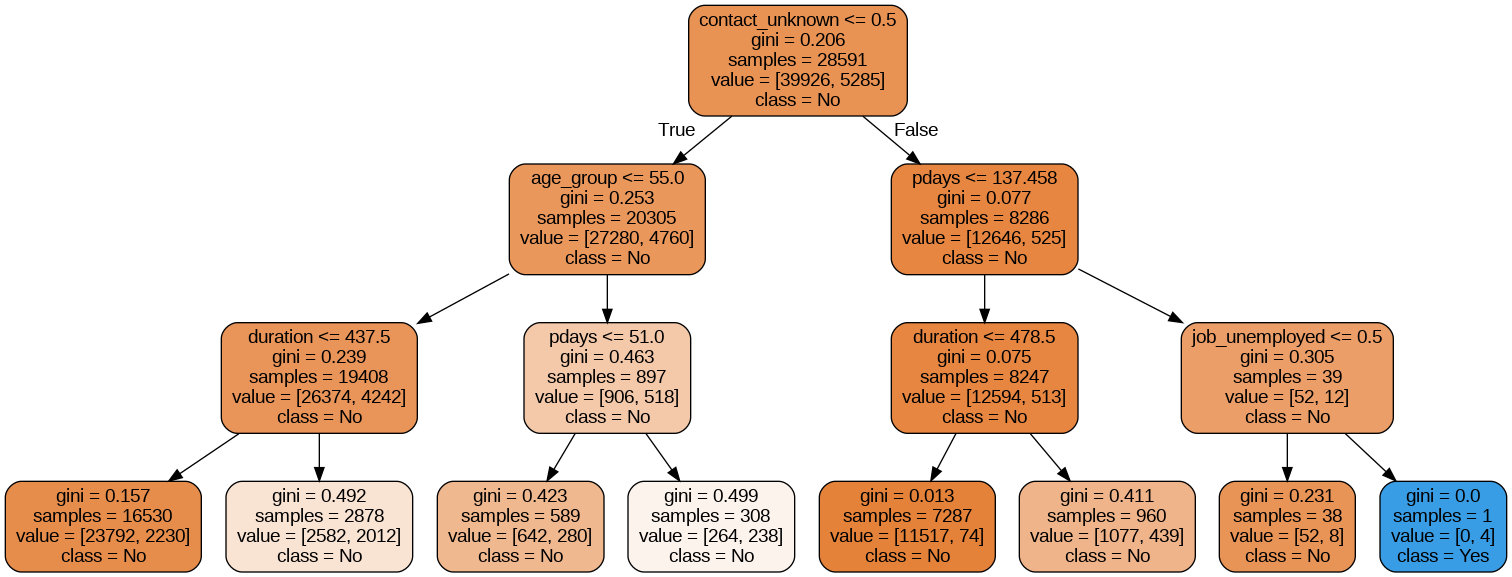

In [ ]:
#Cell 38
rfc_over = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = 3,
                                   max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                   min_samples_leaf = 1, min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0, n_estimators = 50, n_jobs = -1,
                                   oob_score = False, random_state = 42, verbose = 0, warm_start = False)
rfc_over.fit(X, y)

random_forest_tree = open('random_forest.dot','w')
dot_data = export_graphviz(rfc_over.estimators_[0], out_file = random_forest_tree, feature_names = list(X_train), class_names = ['No', 'Yes'], rounded = True, proportion = False, filled = True)
random_forest_tree.close()

retCode = system("dot -Tpng random_forest.dot -o random_forest.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("random_forest.png"))

Feature Importance for Random Forest Classifier  ----------------------------------------------------------------------------


<Axes: >

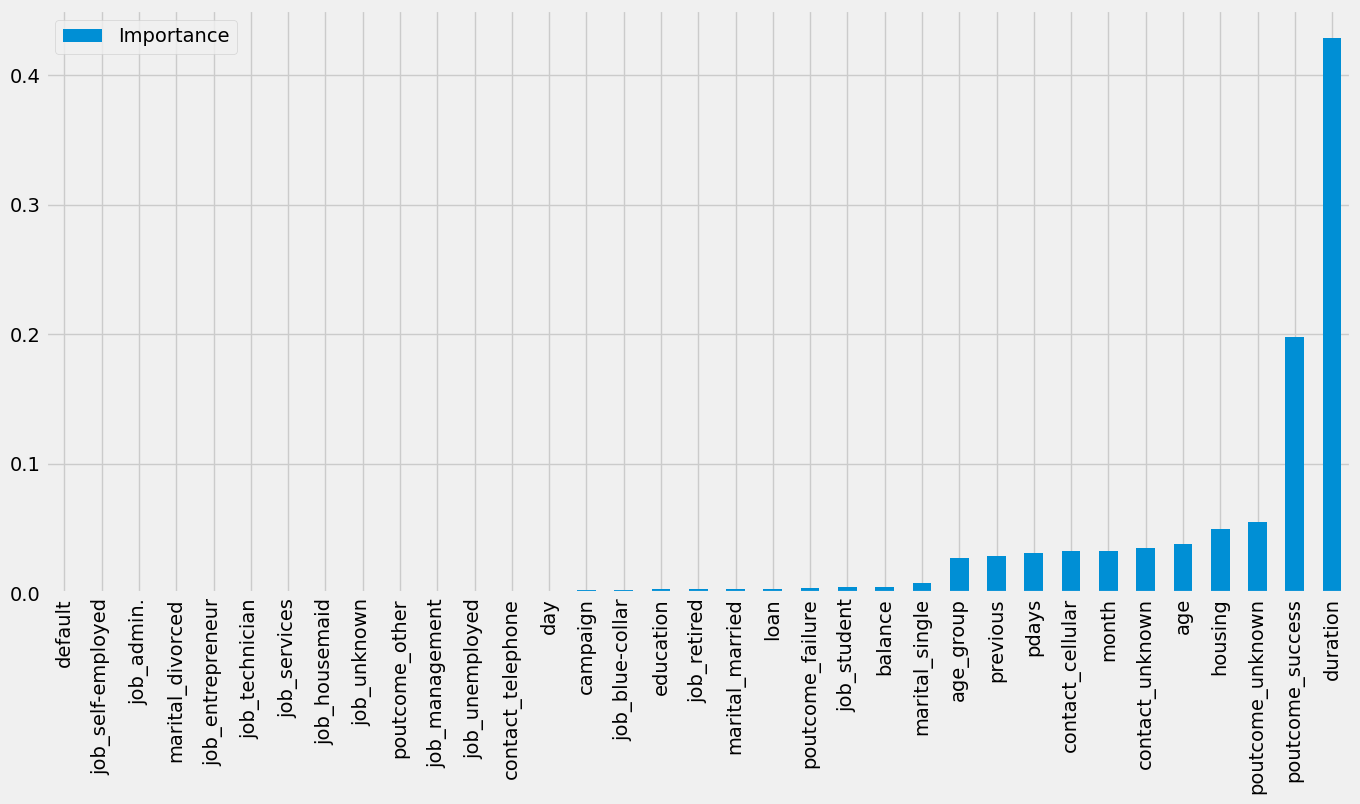

In [ ]:
#Cell 39
print('Feature Importance for Random Forest Classifier ', '--'*38)
feature_importances = pd.DataFrame(rfc_over.feature_importances_, index = X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'bar', figsize = (15, 7.2))

In [ ]:
#Cell 40
if df.index.duplicated().any():
  df = df.loc[~df.index.duplicated(), :]
if df.columns.duplicated().any():
  df = df.loc[:, ~df.columns.duplicated()]
print('Conditional Formatting on the scores dataframe ', '--'*39)
display(df.style.background_gradient(cmap = sns.light_palette('green', as_cmap = True)))


Conditional Formatting on the scores dataframe  ------------------------------------------------------------------------------


,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Baseline Model,0.882000,0.000000,0.000000,0.000000,4.246000
Decision Tree,0.898000,0.647000,0.288000,0.397000,0.272000
Bagging,0.899000,0.650000,0.286000,0.397000,0.267000
Gradient Boosting,0.901000,0.666000,0.314000,0.426000,0.229000
Random Forest,0.901000,0.656000,0.334000,0.442000,0.228000


Conditional Formatting on the scores dataframe  ------------------------------------------------------------------------------


,Accuracy,Precision_Subscribe,Recall_Subscribe,f1_Subscribe,Log_Loss
Decision Tree,0.898000,0.647000,0.288000,0.397000,0.272000
Bagging,0.899000,0.650000,0.286000,0.397000,0.267000
Gradient Boosting,0.901000,0.666000,0.314000,0.426000,0.229000
Random Forest,0.901000,0.656000,0.334000,0.442000,0.228000


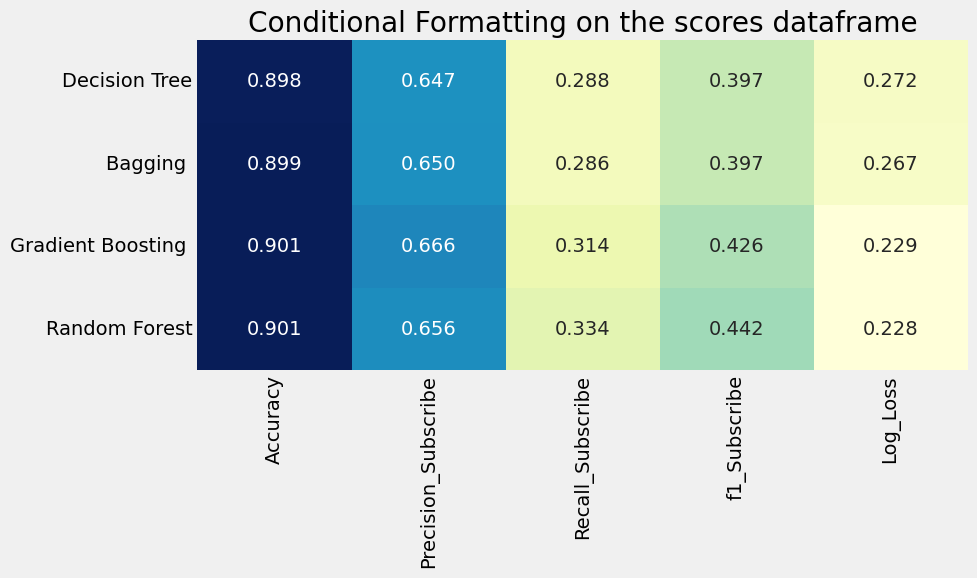

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

# Assuming df is your DataFrame containing the results
if df.index.duplicated().any():
    df = df.loc[~df.index.duplicated(), :]
if df.columns.duplicated().any():
    df = df.loc[:, ~df.columns.duplicated()]

# Exclude the Baseline Model from the DataFrame
df_without_baseline = df.drop('Baseline Model', axis=0)

# Display the table with conditional formatting
print('Conditional Formatting on the scores dataframe ', '--'*39)
display(df_without_baseline.style.background_gradient(cmap = sns.light_palette('green', as_cmap = True)))

# Plotting the DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df_without_baseline, annot=True, cmap='YlGnBu', fmt='.3f', cbar=False)
plt.title('Conditional Formatting on the scores dataframe')
plt.tight_layout()
plt.savefig('results_table.png')

# Display the image
plt.show()


In [ ]:
#Cell 41

print(df.columns)


Index(['Accuracy', 'Precision_Subscribe', 'Recall_Subscribe', 'f1_Subscribe',
       'Log_Loss'],
      dtype='object')


##Modal Accuracy Comparison

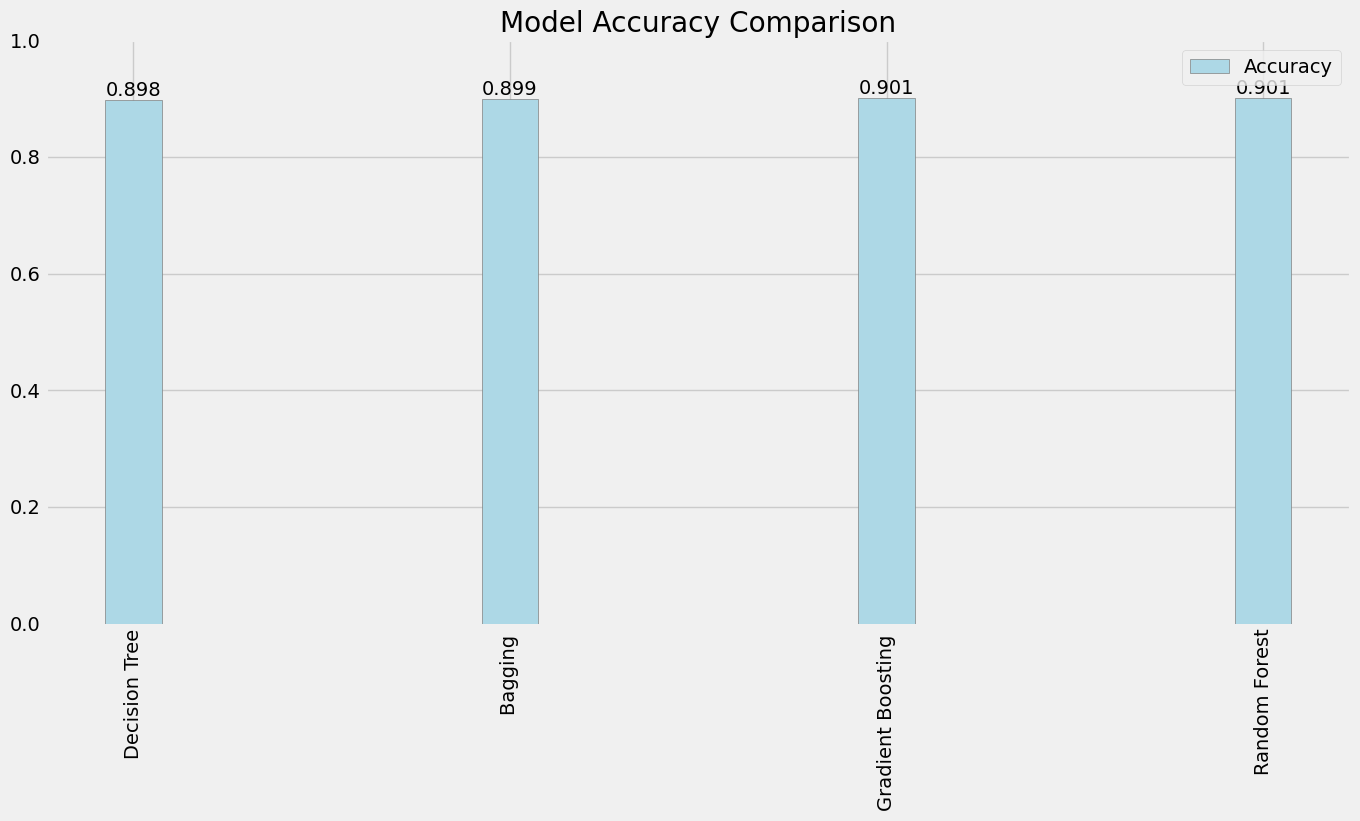

In [ ]:
#Cell 42

# Exclude 'Baseline Model' from the dataframe before plotting
df_no_baseline = df.drop(index='Baseline Model')

# Setting up the bar width and positions
barWidth = 0.15
r1 = np.arange(len(df_no_baseline))

# Make the plot for Accuracy
fig = plt.figure(figsize=(15, 7.2))
ax = fig.add_subplot(111)

bars1 = ax.bar(r1, df_no_baseline['Accuracy'], color='lightblue', width=barWidth, edgecolor='grey', label='Accuracy', zorder=3)

ax.set_ylim(0, 1.0)

# Add xticks on the middle of the group bars
#ax.set_xlabel('Model', fontweight='bold')
ax.set_xticks(r1)
ax.set_xticklabels(df_no_baseline.index, rotation=90)

# Create legend
plt.legend()

plt.title('Model Accuracy Comparison')

# Add values on top of each bar
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')

add_values_on_top(bars1)

plt.show()


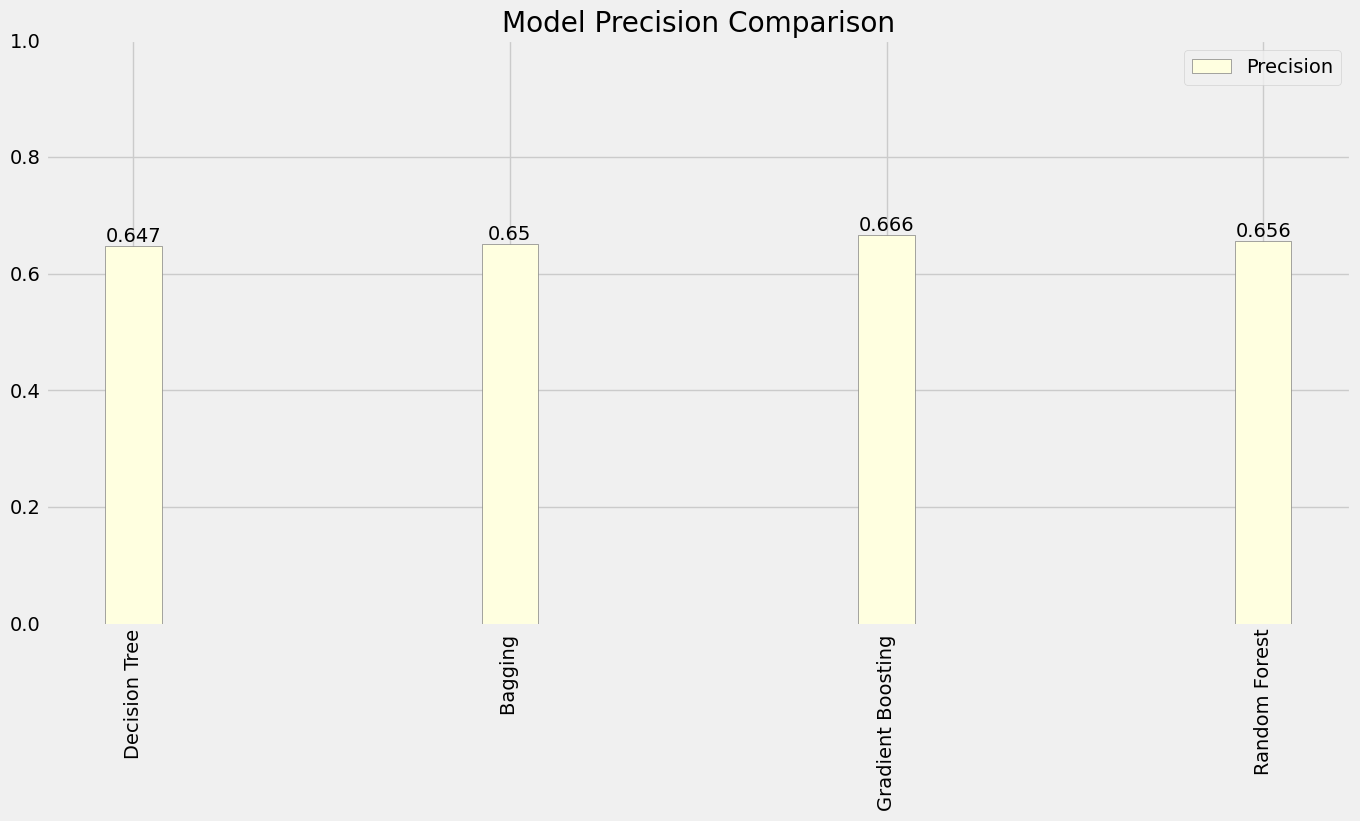

In [ ]:
#Cell 43

# Exclude 'Baseline Model' from the dataframe before plotting
df_no_baseline = df.drop(index='Baseline Model')

# Setting up the bar width and positions
barWidth = 0.15
r2 = np.arange(len(df_no_baseline))

# Make the plot for Precision
fig = plt.figure(figsize=(15, 7.2))
ax = fig.add_subplot(111)

bars2 = ax.bar(r2, df_no_baseline['Precision_Subscribe'], color='lightyellow', width=barWidth, edgecolor='grey', label='Precision', zorder=3)

ax.set_ylim(0, 1.0)

# Add xticks on the middle of the group bars
#ax.set_xlabel('Model', fontweight='bold')
ax.set_xticks(r2)
ax.set_xticklabels(df_no_baseline.index, rotation=90)

# Create legend
plt.legend()

plt.title('Model Precision Comparison')

# Add values on top of each bar
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')

add_values_on_top(bars2)

plt.show()


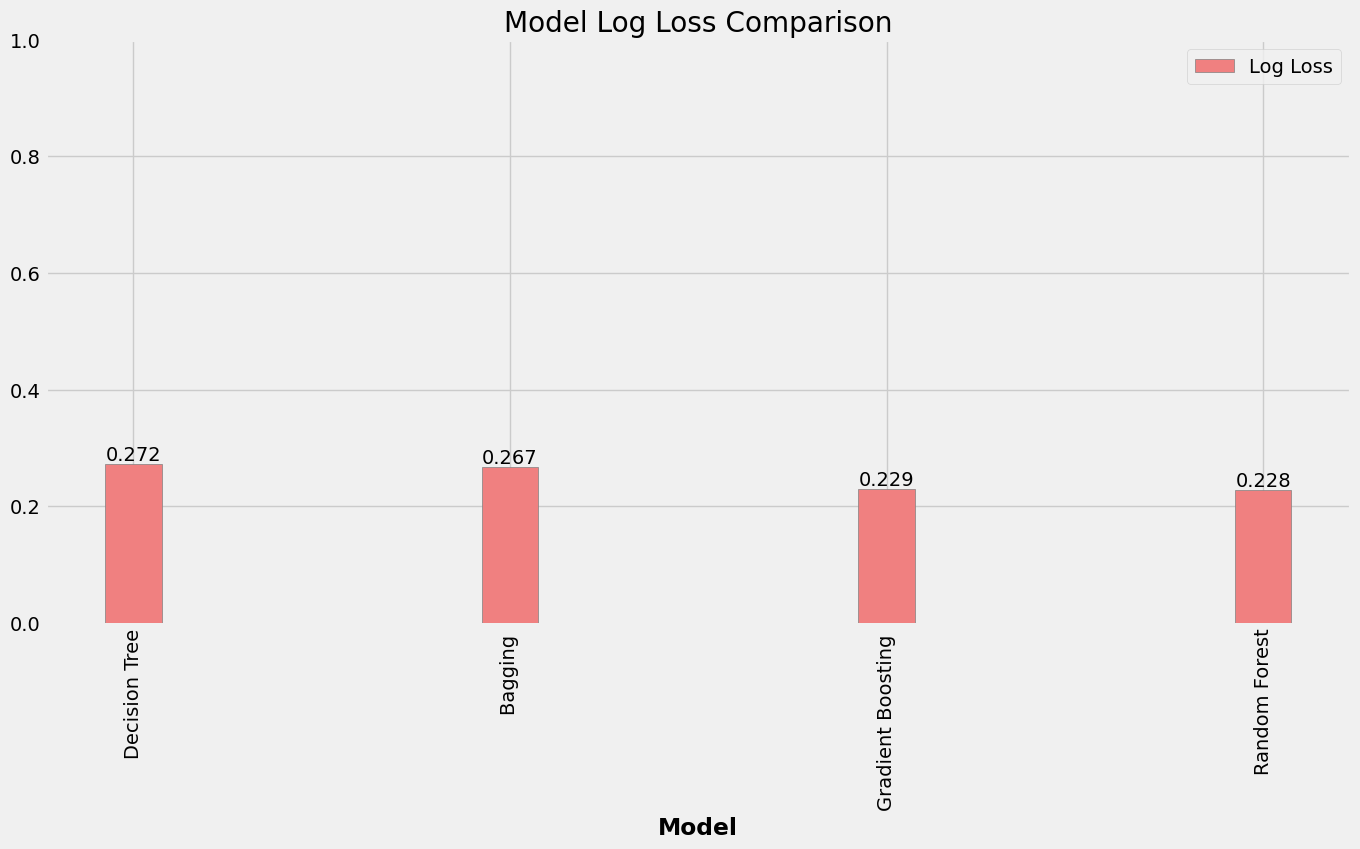

In [ ]:
#Cell 44

# Exclude 'Baseline Model' from the dataframe before plotting
df_no_baseline = df.drop(index='Baseline Model')

# Setting up the bar width and positions
barWidth = 0.15
r3 = np.arange(len(df_no_baseline))

# Make the plot for Log Loss
fig = plt.figure(figsize=(15, 7.2))
ax = fig.add_subplot(111)

bars3 = ax.bar(r3, df_no_baseline['Log_Loss'], color='lightcoral', width=barWidth, edgecolor='grey', label='Log Loss', zorder=3)

ax.set_ylim(0, 1.0)

# Add xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_xticks(r3)
ax.set_xticklabels(df_no_baseline.index, rotation=90)

# Create legend
plt.legend()

plt.title('Model Log Loss Comparison')

# Add values on top of each bar
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')

add_values_on_top(bars3)

plt.show()


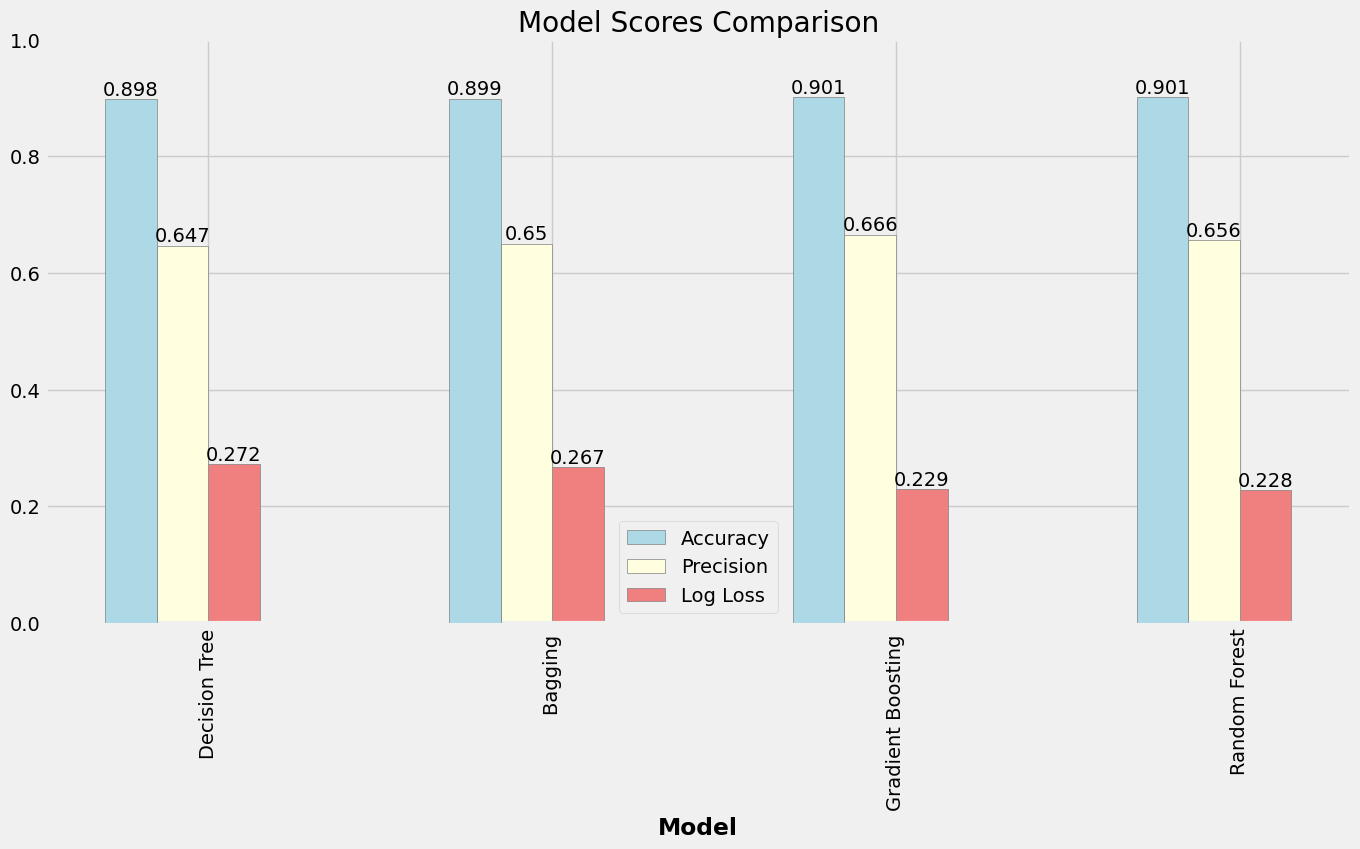

In [ ]:
#Cell 45

# Exclude 'Baseline Model' from the dataframe before plotting
df_no_baseline = df.drop(index='Baseline Model')

barWidth = 0.15
r1 = np.arange(len(df_no_baseline))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
fig = plt.figure(figsize=(15, 7.2))
ax = fig.add_subplot(111)

bars1 = ax.bar(r1, df_no_baseline['Accuracy'], color='lightblue', width=barWidth, edgecolor='grey', label='Accuracy', zorder=3)
bars2 = ax.bar(r2, df_no_baseline['Precision_Subscribe'], color='lightyellow', width=barWidth, edgecolor='grey', label='Precision', zorder=2)
bars3 = ax.bar(r3, df_no_baseline['Log_Loss'], color='lightcoral', width=barWidth, edgecolor='grey', label='Log Loss', zorder=1)

ax.set_ylim(0, 1.0)

# Add xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_xticks([r + barWidth * 1.5 for r in range(len(df_no_baseline))])
ax.set_xticklabels(df_no_baseline.index, rotation=90)

# Create legend without the 'Baseline Model' label
plt.legend()

plt.title('Model Scores Comparison')

# Add values on top of each bar
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')

add_values_on_top(bars1)
add_values_on_top(bars2)
add_values_on_top(bars3)

plt.show()
